# Analytics Cup 2023

Group Members:

Deniz Kayserilioğlu 03771406

Yung Yu Hsu 03729699

Panyin Edwina Lai 03730383

Nga Man Cheung 03729449

In [ ]:
import pandas as pd  
import numpy as np 
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:,.2f}".format
from datetime import datetime
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from array import array
from sklearn.metrics import f1_score
%matplotlib inline
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Understanding Data

###Datasets

In [ ]:
uploaded = files.upload()

####classification.csv

In [ ]:
clas = pd.read_csv('classification.csv')
clas

,Customer_ID,Reseller,Test_set_id
0,0xEBA40863A972E2E1B2D579D1B1CD74F9F2784B144214...,0.00,NaN
1,0x42D1F183BD3ADFD8E7FC3005694FB1D8DA4028E6B020...,0.00,NaN
2,0x81B4565938C209532732CB6F09A1285A606837CE42B2...,0.00,NaN
3,0x91E88221726827AE4A331B8C5DB703EBF2DC4C0DC660...,0.00,NaN
4,0xA2E082DE557CB06BB70E90730CB58BDF408A5A51D1FF...,0.00,NaN
...,...,...,...
2556,0xB45B4FB781A3F025E662EB37D4E84ADBBAB1F9A67FA2...,0.00,NaN
2557,0xEF2105CAB70BD0AE24E032E0A53BFC0ABBE695574A26...,0.00,NaN
2558,0x04E5984BF3CDBACFF000B7783DCE955E3E1A11723F73...,0.00,NaN
2559,0x598B5705032D149F4D9B44DC58887A670039AF730463...,NaN,"2,560.00"


In [ ]:
clas.describe

<bound method NDFrame.describe of                                             Customer_ID  Reseller  Test_set_id
0     0xEBA40863A972E2E1B2D579D1B1CD74F9F2784B144214...      0.00          NaN
1     0x42D1F183BD3ADFD8E7FC3005694FB1D8DA4028E6B020...      0.00          NaN
2     0x81B4565938C209532732CB6F09A1285A606837CE42B2...      0.00          NaN
3     0x91E88221726827AE4A331B8C5DB703EBF2DC4C0DC660...      0.00          NaN
4     0xA2E082DE557CB06BB70E90730CB58BDF408A5A51D1FF...      0.00          NaN
...                                                 ...       ...          ...
2556  0xB45B4FB781A3F025E662EB37D4E84ADBBAB1F9A67FA2...      0.00          NaN
2557  0xEF2105CAB70BD0AE24E032E0A53BFC0ABBE695574A26...      0.00          NaN
2558  0x04E5984BF3CDBACFF000B7783DCE955E3E1A11723F73...      0.00          NaN
2559  0x598B5705032D149F4D9B44DC58887A670039AF730463...       NaN     2,560.00
2560  0xC6C4583FB811BE41376D704C0DB7F71B8EF7D4203E82...      0.00          NaN

[2561 rows x 3 co

In [ ]:
clas.dtypes

Customer_ID     object
Reseller       float64
Test_set_id    float64
dtype: object

In [ ]:
clas["Reseller"].value_counts(dropna=False)
#clas['Reseller'].isna().sum()

0.00    1914
NaN      512
1.00     135
Name: Reseller, dtype: int64

In [ ]:
clas["Test_set_id"].value_counts(dropna=False)

NaN         2049
1,331.00       1
1,714.00       1
1,713.00       1
1,712.00       1
            ... 
852.00         1
851.00         1
850.00         1
847.00         1
2,560.00       1
Name: Test_set_id, Length: 513, dtype: int64

In [ ]:
clas.groupby(['Customer_ID']).nunique()

,Reseller,Test_set_id
Customer_ID,,
0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3C86C939BCDD30DF62DDE,1,0
0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5FBD4F7E5707C1B199A51,1,0
0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17F95E44882AAB6FB646D5,1,0
0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD83515BF7495333D837A3,0,1
0x005C37F189C563C903F70761C04175F836C49C93D97C48B2EC934D41C22BBC16,1,0
...,...,...
0xFFAFAD99C7810393524EFD48A2BE215F026F7703485CB2F5C2262BDD90B7DD34,1,0
0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB7668857D58F794120555,1,0
0xFFB38FD8DC9DF19BD829225AE8B38D5BCAF0A3B86772280358E65CDE41E9BA91,0,1


In [ ]:
clas.Customer_ID.value_counts()

0xEBA40863A972E2E1B2D579D1B1CD74F9F2784B144214276548AE9B0432DD034F    1
0x915F729EF8A69A806EC4B698029199154CB397B64CFADFAEEF92162BC159B22C    1
0x4CBE94DB73C5B25559D4092FE2AD910AC4CFF4A3DF15F3F503B1F8407787D530    1
0x99109A673F7AD76755B7B9D736D31AAFAA54EA5EE2DFDE2A1DE7C116EF8A4F68    1
0x374060B46F58145D5C80F2204A1C5B95D86189184BCCAC6D98EA6EBEB51EE6D0    1
                                                                     ..
0xC1CEA8660B24117CFDF07A28D1C1A782B4FC06428CDFEB662CF3912642277236    1
0x49819AB6B7D70CFF670E13E6D22B20E189E09F53CF1DB6A1783345A1633D9272    1
0xED7942670588C25A211ADEDD37ADC06419F2D6372471AFE800320F6EF4DBAD40    1
0x7EA72461C8349FB0C5AD353DB152030D209D45B41524DDCF8D0806770C6436DD    1
0xC6C4583FB811BE41376D704C0DB7F71B8EF7D4203E82B34A937AC778DF85D9B2    1
Name: Customer_ID, Length: 2561, dtype: int64

In [ ]:
clas.duplicated(subset="Customer_ID").sum()

0

####customers.csv

In [ ]:
cust = pd.read_csv('customers.csv')
cust

,Sales_Order,Item_Position,Type,Customer_ID
0,0xD8E91B197C354720BFFF82604C2BCE941328B09666FD...,0,SOP,0x049CFC54FE8AA9A88BA48E6D729DE681D1AA40D0B4BB...
1,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...
2,0x498F726177725758CDF232177AEF974709633F88B892...,0,STP,0xA60E4AC389AC60EA14DBD9696C6EB4DE04784D44108C...
3,0xE9A8A31B43AEF35A3E249F249C09412B42664594E243...,0,SOP,0xFF726608576F41A17D67B5DE062DB982BEBDCED554D6...
4,0xF76784AD73F9A77EBB209F71A45206C9268120B470AB...,0,SOP,0x2696380B2C98A98282D79FAB420E2C9DA678ACB6AF09...
...,...,...,...,...
181456,0x0EE428A8957224C0227213E0DBD552F13EAAAF300D6C...,0,SOP,0xB6502F1E6A7DE337238AFDC478D8BA4B9DF8CB23E6A2...
181457,0x0151464C33018C40BE8DD1AC8C2786B3A528CA82CE84...,0,SOP,0xF04175FC9788967DD41AB09E4B90874E338ADE8EEB36...
181458,0x04EA79386A00BF693E3042F2F42DEDA6F320F0197036...,0,SOP,0xFCA0BFAA9FA6B1DFF746682DD36F7CAD2E8F50A8C3D8...
181459,0x02D7E33A1DBCF7BF3F4E57EC902169D6B22D89A273D7...,0,SOP,0x2B26F0FD2E4CE6A8AA6CFC0EABD29E89CD4860B95942...


In [ ]:
cust.dtypes

Sales_Order      object
Item_Position     int64
Type             object
Customer_ID      object
dtype: object

In [ ]:
cust.duplicated(subset="Customer_ID").sum()

178900

In [ ]:
cust.groupby(['Customer_ID']).nunique().sort_values('Sales_Order', axis = 0, ascending = False)

,Sales_Order,Item_Position,Type
Customer_ID,,,
0x1EEECCB960611A24E18B99CDE33D5ABA58DDF20248610D76D4D49299D903358D,4184,3,2
0x73580D3170469F68D798A9EBB660C3D441E16F5C8DD7C5C587749FA33A890579,2908,1,2
0x29F1CF19DB1C49A5DBE6908937FC0ED68DEAA0520EBBA4A927129D9C653F254F,2074,1,2
0xBAE7201778B9C22824141289A8672F8AC76B303BD9EB1A8809967D8726B5E9BB,2031,2,2
0x87D58003FD6DA17DB1E1219A5BC30110212F43A32C119A9F020E71AB512EAF74,2023,1,2
...,...,...,...
0x778F13F0F9CE6C3AFABAE2C0FE452D58EF4AC8E6C5FA04989E6CEEB15F355F0D,1,1,2
0x775F1AC6BA75681A678431651C2B5D46901A18BCA3796142EA476423B6487148,1,1,2
0x27AEC340D541DDA9AFD786C3E7DC707C414A41C9E31636D6512B2D59042B2DAF,1,1,1


In [ ]:
cust[cust['Customer_ID']=='0x557A29AE12366D794E0C4DCDBD511A9FD9483C01DCF3CA6F24CF4036BE76D11D']

,Sales_Order,Item_Position,Type,Customer_ID
77086,0xBADFFC391FE23806B7999BE87D090C6FD119EADE7901...,0,STP,0x557A29AE12366D794E0C4DCDBD511A9FD9483C01DCF3...
84908,0xBADFFC391FE23806B7999BE87D090C6FD119EADE7901...,0,SOP,0x557A29AE12366D794E0C4DCDBD511A9FD9483C01DCF3...


In [ ]:
cust.groupby(['Sales_Order']).nunique().sort_values('Customer_ID', axis = 0, ascending = False)

,Item_Position,Type,Customer_ID
Sales_Order,,,
0x13C62EC42590BAA615989300F2F34445B2056D829BB5FFB526753516DC8F112D,3,2,2
0xE1D1D378AA83C780DFD7124E9899BDBA23A571EC91195E0EB5A278C7138F615D,1,2,2
0x6CE6C171045564201B18B668F923CC7FFBCB1D166DE25B6870E6A94B77A9F453,1,2,2
0x7149719691361A9870D65865E6062F3AB9F602DEFBD2A93E935B17A917245E8E,2,2,2
0x2D5FFB7E95303D1F3EFDAAAB759DE47E93FA6B469F93245FD5E8ED0845C1BB2E,1,2,2
...,...,...,...
0x559E618FE831781782FF3C00EA1B139A74AFAE2A32C21FCC66E469E0B7ED4177,1,1,1
0x559FA4CA0D6AFE885141D9969AB5BD2F5E932EAE933D6E6C697E82695A789F8D,1,1,1
0x559FCFA77632948A5FAAEEEAECBECC557649441E6C790D3638A00E88A1812383,1,1,1


In [ ]:
cust[cust['Sales_Order']=='0x13C62EC42590BAA615989300F2F34445B2056D829BB5FFB526753516DC8F112D']

,Sales_Order,Item_Position,Type,Customer_ID
61783,0x13C62EC42590BAA615989300F2F34445B2056D829BB5...,60,STP,0x5E93692A822D562A3F3025CDAC249F19FEA8A27A7388...
67054,0x13C62EC42590BAA615989300F2F34445B2056D829BB5...,0,SOP,0x79D1399E14D47E4035C6C2792660FE5EDF67605C43F8...
78875,0x13C62EC42590BAA615989300F2F34445B2056D829BB5...,0,STP,0x79D1399E14D47E4035C6C2792660FE5EDF67605C43F8...
104419,0x13C62EC42590BAA615989300F2F34445B2056D829BB5...,40,STP,0x5E93692A822D562A3F3025CDAC249F19FEA8A27A7388...


In [ ]:
cust.groupby(['Item_Position']).nunique().sort_values('Type', axis = 0, ascending = False)

,Sales_Order,Type,Customer_ID
Item_Position,,,
0,150051,2,2561
7040,1,1,1
410,1,1,1
420,1,1,1
1000,37,1,24
...,...,...,...
300,1,1,1
310,1,1,1
320,1,1,1


####sales-order.csv

In [ ]:
orders = pd.read_csv('sales_orders.csv')
orders

,Sales_Order,Item_Position,Num_Items,Material_Code,Material_Class,Cost_Center,Net_Value
0,0x92B0CCA04AF6804CE5D299A0C20BD96F16ED3D6BDCF9...,11000,1.00,0x8E1AB3A3DDBB99A45C44AC35D7A7A0F208946F576864...,18.00,0xAB3B7F8918CDACA52002780460CCFAF7B113B560A1E2...,1045207
1,0x6091C5004270C4D49A276C66EF71B83002AD36338DDF...,67000,1.00,0x812C751C273B40948E4A937CBB5AB38C676CFBE7BB60...,28.00,0x419920BE240B5096878D241AFF47DA2EA700E1D6A9F4...,1191319
2,0x9393F4F47F1A815D932197A94F0850B3A4172A134AFB...,5000,1.00,0x4A2747BDF72B7B1720F3F6A8BF90744BBAB01EBFFB54...,227.00,0xFBDD9525DCE6ACB23FC4CE6CF063EDB06C81092C38B1...,892796
3,0xCD2E329112884D9A79B418474FA46BD159B7BCD72158...,1000,1.00,0x9152D30BF4C4D87AC9AE9F6B572435FA89267D5389FA...,175.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,1284602
4,0x9FA24B3A4BF25DC5C142FCBC24E33CBF6993B53E6298...,4000,1.00,0xA991424644824072D8F2C3EEB39C3303B5BF203AC3A4...,227.00,0x419920BE240B5096878D241AFF47DA2EA700E1D6A9F4...,1050167
...,...,...,...,...,...,...,...
1248884,0xF873CD1657BCA8B0AF6457FA72A4B0667384E4CB85A9...,18000,1.00,0xB5CBB9B642581BD26E75F1E210514A01D777AA1920BF...,68.00,0x0A5539D6244CBE66F58F7CD6B3BE55BB94324F1A4216...,1075523
1248885,0xF1EB7469590B4DD93227214C857783E2517D43E61C0D...,17000,3.00,0x5BBB30CA0BC6B8E50FDD56B87674F85EE0EC694AE7D8...,222.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,1043904
1248886,0x15B25E28933A5BA33D39A014A7181B4FC039AB66D9C7...,19000,1.00,0x7AB6831C0D69EF3B8B3DD1D2D07396A652D13ED18653...,68.00,0x31ECFA8873E62F729F0F6440C258882E04C689CB9DF1...,1082893
1248887,0xE8FC6B3AFF283C8FA69576FF3FD57E0D08663DEBE0AB...,44000,9.00,0x406A72FCFF54A44D9FDF04593229CE482FD64B26E888...,326.00,0xAB3B7F8918CDACA52002780460CCFAF7B113B560A1E2...,919597


In [ ]:
orders.dtypes

Sales_Order        object
Item_Position       int64
Num_Items         float64
Material_Code      object
Material_Class    float64
Cost_Center        object
Net_Value           int64
dtype: object

In [ ]:
orders.groupby(['Sales_Order', 'Item_Position']).nunique().sort_values('Net_Value', axis = 0, ascending = False)

Num_Items  \
Sales_Order                                        Item_Position              
0x00003CE59022769D3F6C1B83A11745BEF37BE1980ADA6... 1000                   1   
0xA952A07BEB0E575B197D99BE01D29A7EA76C8633B9412... 71000                  1   
                                                   78000                  1   
                                                   77000                  1   
                                                   76000                  1   
...                                                                     ...   
0x56346718095478F5F224741CE94570476CF4693A2BC28... 9000                   1   
                                                   8000                   1   
                                                   7000                   1   
                                                   6000                   1   
0xFFFF7809D7EF79A6063C320958412613F1B98EEC7156F... 2000                   1   

                                                                  Material_Code  \
Sales_Order                                        Item_Position                  
0x00003CE59022769D3F6C1B83A11745BEF37BE1980ADA6... 1000                       1   
0xA952A07BEB0E575B197D99BE01D29A7EA76C8633B9412... 71000                      1   
                                                   78000                      1   
                                                   77000                      1   
                                                   76000                      1   
...                                                                         ...   
0x56346718095478F5F224741CE94570476CF4693A2BC28... 9000                       1   
                                                   8000                       1   
                                                   7000                       1   
                                                   6000                       1   
0xFFFF7809D7EF79A6063C320958412613F1B98EEC7156F... 2000                       1   

                                                                  Material_Class  \
Sales_Order                                        Item_Position                   
0x00003CE59022769D3F6C1B83A11745BEF37BE1980ADA6... 1000                        1   
0xA952A07BEB0E575B197D99BE01D29A7EA76C8633B9412... 71000                       1   
                                                   78000                       1   
                                                   77000                       1   
                                                   76000                       1   
...                                                                          ...   
0x56346718095478F5F224741CE94570476CF4693A2BC28... 9000                        1   
                                                   8000                        1   
                                                   7000                        1   
                                                   6000                        1   
0xFFFF7809D7EF79A6063C320958412613F1B98EEC7156F... 2000                        1   

                                                                  Cost_Center  \
Sales_Order                                        Item_Position                
0x00003CE59022769D3F6C1B83A11745BEF37BE1980ADA6... 1000                     1   
0xA952A07BEB0E575B197D99BE01D29A7EA76C8633B9412... 71000                    1   
                                                   78000                    1   
                                                   77000                    1   
                                                   76000                    1   
...                                                                       ...   
0x56346718095478F5F224741CE94570476CF4693A2BC28... 9000                     1   
                                                   8000                     1   
                                                   7000

In [ ]:
orders.groupby(['Material_Class']).nunique()

,Sales_Order,Item_Position,Num_Items,Material_Code,Cost_Center,Net_Value
Material_Class,,,,,,
1.00,55,13,8,51,3,49
2.00,196,18,34,34,4,197
3.00,6,6,6,2,1,6
4.00,3527,276,78,596,10,5305
5.00,82,26,10,11,1,71
...,...,...,...,...,...,...
343.00,1437,179,53,18,10,1073
344.00,8,4,4,5,1,9
345.00,36,18,8,8,5,28


In [ ]:
orders.groupby(['Cost_Center']).nunique().size

198

####sales_orders_header.csv

In [ ]:
orders_header = pd.read_csv('sales_orders_header.csv')
orders_header

,Sales_Organization,Sales_Order,Creation_Date,Creator,Document_Type,Release_Date,Delivery,Net_Value
0,A,0xFF6441F39DC79BB70B71F95ABE3731DA2118D4113190...,2021-06-13T00:00:00Z,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-06-13 00:00:00.000,Not relevant,900396
1,A,0xE7865A64D98FB3F1828997003F44B1107D8850C55F18...,2021-04-29T00:00:00Z,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-04-29 00:00:00.000,Not relevant,994572
2,A,0xAA8BE6E283F55BCE267C1F9D89D6C111AC1B84AC90B3...,2021-06-07T00:00:00Z,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-06-07 00:00:00.000,Not relevant,856793
3,A,0xA54822A08026D1CA204B8495B8625CC07CF6E636544A...,2021-04-19T00:00:00Z,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-04-19 00:00:00.000,Not relevant,102657
4,A,0xDEEA53B5E16AB931195D4AD8794D23A62778A0A1923D...,2021-08-15T00:00:00Z,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-08-15 00:00:00.000,Not relevant,983021
...,...,...,...,...,...,...,...,...
150053,B,0x0F280D30A4B8084CC68BE8751A9AF3940199B4877180...,2021-11-10T00:00:00Z,0x7A8F4BFC84E1012A560412C58D3ECC36D6841A10F6C4...,Order,2021-11-10 00:00:00.000,Not relevant,853524
150054,B,0xF510DAD8F5FD4FF211BE7F2B0ADAC20B02699D2E17FB...,2021-08-05T00:00:00Z,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-08-05 00:00:00.000,Not relevant,1017436
150055,B,0x03FFF53CFB845329CD51895067BE9D91171CD5849170...,2021-05-25T00:00:00Z,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-05-25 00:00:00.000,Not relevant,953701
150056,B,0x4843EB3F7D4212E07F9082D8278EB7B5AC53E1A4370A...,2021-08-26T00:00:00Z,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-08-26 00:00:00.000,Not relevant,879913


In [ ]:
orders_header.dtypes

Sales_Organization    object
Sales_Order           object
Creation_Date         object
Creator               object
Document_Type         object
Release_Date          object
Delivery              object
Net_Value              int64
dtype: object

In [ ]:
orders_header.nunique()

Sales_Organization         2
Sales_Order           150058
Creation_Date            388
Creator                  136
Document_Type              5
Release_Date             389
Delivery                   4
Net_Value             103153
dtype: int64

In [ ]:
orders_header.groupby(['Creator']).nunique()

,Sales_Organization,Sales_Order,Creation_Date,Document_Type,Release_Date,Delivery,Net_Value
Creator,,,,,,,
0x00BBFBA830A588E7F5F433E547CC6BAD305637C4818F69ECA5EECB709F5C0265,1,108,76,1,76,1,73
0x04C1E374BB894902D4E1A7BB320BA396D087EBE6BD3D4F777C8928AEF02A630E,1,9,7,2,5,1,9
0x05631A13DCF5A026E1383F16B9E25F25D96AA8D0C687B75543F163F4E47F93F5,1,50,38,2,38,2,49
0x07CBB4B74951C6A740F9F52B3D96F88C8977EBE4CAA12000CA49F618E646742B,2,153,73,2,72,3,139
0x0A5208740F07E53C561BA956CA1F3BA2A285CA380D9CBE09B378AE8CB5E7F491,2,5,4,2,4,2,5
...,...,...,...,...,...,...,...
0xF771CB1F890C46C16B60EAB431898A40B3B5FAC858892E811EBB00ED6E1791F2,1,81,55,3,55,3,73
0xF95EC269B70F9BEDE89FBD7478E162FCBDF16B2B4ABA731EAE7FD7890AA11E02,2,264,160,2,151,3,251
0xF9DAF624DE463F5437AE99F82534BBEE433FE88E3498AD89D5FF102F2BCFAAD7,1,121,75,3,75,3,117


In [ ]:
orders_header.groupby(['Sales_Organization']).nunique()

,Sales_Order,Creation_Date,Creator,Document_Type,Release_Date,Delivery,Net_Value
Sales_Organization,,,,,,,
A,49776,360,112,5,359,4,30522
B,100282,375,83,4,377,4,79496


In [ ]:
orders_header.groupby(['Document_Type']).nunique()

,Sales_Organization,Sales_Order,Creation_Date,Creator,Release_Date,Delivery,Net_Value
Document_Type,,,,,,,
Contract,1,1356,212,6,101,1,434
Credit memo,2,1399,244,28,146,1,1373
Order,2,146723,386,117,388,4,101678
Order w/o charge,2,47,40,23,40,3,1
Returns,2,533,213,58,213,3,459


In [ ]:
orders_header.groupby(['Delivery']).nunique().sort_values('Sales_Organization', axis = 0, ascending = False)

,Sales_Organization,Sales_Order,Creation_Date,Creator,Document_Type,Release_Date,Net_Value
Delivery,,,,,,,
Completely processed,2,8074,341,80,3,338,4186
Not relevant,2,141153,384,125,4,386,99906
Not yet processed,2,502,141,49,2,130,390
Partially processed,2,329,160,23,3,139,262


In [ ]:
orders_header.Creation_Date.isna().sum()

0

In [ ]:
orders_header.Creation_Date = pd.to_datetime(orders_header.Creation_Date, format="%Y-%m-%d")
orders_header.Release_Date = pd.to_datetime(orders_header.Release_Date, format="%Y-%m-%d")
#orders_header.Creation_Date = orders_header.Creation_Date.dt.date
#orders_header.Release_Date = orders_header.Release_Date.dt.date
orders_header

,Sales_Organization,Sales_Order,Creation_Date,Creator,Document_Type,Release_Date,Delivery,Net_Value
0,A,0xFF6441F39DC79BB70B71F95ABE3731DA2118D4113190...,2021-06-13 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-06-13,Not relevant,900396
1,A,0xE7865A64D98FB3F1828997003F44B1107D8850C55F18...,2021-04-29 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-04-29,Not relevant,994572
2,A,0xAA8BE6E283F55BCE267C1F9D89D6C111AC1B84AC90B3...,2021-06-07 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-06-07,Not relevant,856793
3,A,0xA54822A08026D1CA204B8495B8625CC07CF6E636544A...,2021-04-19 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-04-19,Not relevant,102657
4,A,0xDEEA53B5E16AB931195D4AD8794D23A62778A0A1923D...,2021-08-15 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-08-15,Not relevant,983021
...,...,...,...,...,...,...,...,...
150053,B,0x0F280D30A4B8084CC68BE8751A9AF3940199B4877180...,2021-11-10 00:00:00+00:00,0x7A8F4BFC84E1012A560412C58D3ECC36D6841A10F6C4...,Order,2021-11-10,Not relevant,853524
150054,B,0xF510DAD8F5FD4FF211BE7F2B0ADAC20B02699D2E17FB...,2021-08-05 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-08-05,Not relevant,1017436
150055,B,0x03FFF53CFB845329CD51895067BE9D91171CD5849170...,2021-05-25 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-05-25,Not relevant,953701
150056,B,0x4843EB3F7D4212E07F9082D8278EB7B5AC53E1A4370A...,2021-08-26 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-08-26,Not relevant,879913


In [ ]:
orders_header.nunique()

Sales_Organization         2
Sales_Order           150058
Creation_Date            388
Creator                  136
Document_Type              5
Release_Date             389
Delivery                   4
Net_Value             103153
dtype: int64

####service_map.csv

In [ ]:
service = pd.read_csv('service_map.csv')
service

,MATKL_service
0,30
1,56
2,69
3,73
4,79
5,90
6,101
7,105
8,111
9,112


In [ ]:
service.dtypes

MATKL_service    int64
dtype: object

In [ ]:
orders['Service'] = np.where(orders['Material_Class'].isin(service['MATKL_service']) == True, 1, 0)
orders

,Sales_Order,Item_Position,Num_Items,Material_Code,Material_Class,Cost_Center,Net_Value,Service
0,0x92B0CCA04AF6804CE5D299A0C20BD96F16ED3D6BDCF9...,11000,1.00,0x8E1AB3A3DDBB99A45C44AC35D7A7A0F208946F576864...,18.00,0xAB3B7F8918CDACA52002780460CCFAF7B113B560A1E2...,1045207,0
1,0x6091C5004270C4D49A276C66EF71B83002AD36338DDF...,67000,1.00,0x812C751C273B40948E4A937CBB5AB38C676CFBE7BB60...,28.00,0x419920BE240B5096878D241AFF47DA2EA700E1D6A9F4...,1191319,0
2,0x9393F4F47F1A815D932197A94F0850B3A4172A134AFB...,5000,1.00,0x4A2747BDF72B7B1720F3F6A8BF90744BBAB01EBFFB54...,227.00,0xFBDD9525DCE6ACB23FC4CE6CF063EDB06C81092C38B1...,892796,1
3,0xCD2E329112884D9A79B418474FA46BD159B7BCD72158...,1000,1.00,0x9152D30BF4C4D87AC9AE9F6B572435FA89267D5389FA...,175.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,1284602,0
4,0x9FA24B3A4BF25DC5C142FCBC24E33CBF6993B53E6298...,4000,1.00,0xA991424644824072D8F2C3EEB39C3303B5BF203AC3A4...,227.00,0x419920BE240B5096878D241AFF47DA2EA700E1D6A9F4...,1050167,1
...,...,...,...,...,...,...,...,...
1248884,0xF873CD1657BCA8B0AF6457FA72A4B0667384E4CB85A9...,18000,1.00,0xB5CBB9B642581BD26E75F1E210514A01D777AA1920BF...,68.00,0x0A5539D6244CBE66F58F7CD6B3BE55BB94324F1A4216...,1075523,0
1248885,0xF1EB7469590B4DD93227214C857783E2517D43E61C0D...,17000,3.00,0x5BBB30CA0BC6B8E50FDD56B87674F85EE0EC694AE7D8...,222.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,1043904,0
1248886,0x15B25E28933A5BA33D39A014A7181B4FC039AB66D9C7...,19000,1.00,0x7AB6831C0D69EF3B8B3DD1D2D07396A652D13ED18653...,68.00,0x31ECFA8873E62F729F0F6440C258882E04C689CB9DF1...,1082893,0
1248887,0xE8FC6B3AFF283C8FA69576FF3FD57E0D08663DEBE0AB...,44000,9.00,0x406A72FCFF54A44D9FDF04593229CE482FD64B26E888...,326.00,0xAB3B7F8918CDACA52002780460CCFAF7B113B560A1E2...,919597,0


####business_units.csv

In [ ]:
bu = pd.read_csv('business_units.csv')
bu

,YHKOKRS,Cost_Center,Business_Unit
0,5180,0x3080B8E2C6B11C698A02B2231DCB26E6136D7032E58E...,BU_B
1,5180,0xB5108393FF0A38BD26FD3E04BF75B45536098DADD13D...,BU_C
2,5180,0x908DBFA105C38E69D013577B8E6E18479898DB8B9C37...,BU_C
3,5180,0xF38C65DDD8F540C2ED1FA0DCB7F4D88067643E7CD983...,BU_C
4,5180,0x3554347722C3B2CF9B9D36FA313A698B5E28FA094696...,BU_A
...,...,...,...
121,5180,0xD234D8A78B3A65C180621A41F2B5982BE7F01C012A30...,BU_C
122,5180,0xE20C9A669F1749F8995D3B57FC9151C05E8ABFDC8A22...,BU_C
123,5180,0x24F388CE9BD504D145220BE8A5EA6056259110651D79...,BU_B
124,5180,0xD3C15B8025CEC6126CAAED8D5A8F428A52639E2DC028...,BU_B


In [ ]:
bu.dtypes

YHKOKRS           int64
Cost_Center      object
Business_Unit    object
dtype: object

In [ ]:
bu.YHKOKRS.nunique()

1

In [ ]:
bu.groupby('Cost_Center').nunique().sort_values('YHKOKRS', axis = 0, ascending = False)

,YHKOKRS,Business_Unit
Cost_Center,,
0x020A4E5A999C4127A37897ACA243BA1CCD3DC86D0A96E6B9DF79BC5A171F35B1,1,1
0xA8939D244AA6AB60D2B786C78C3647B6021A2175168005C45B484E21C0937660,1,1
0xB9F335545164E53897F163162F8325FDE4969085231CF8EF368EC1200495E6CD,1,1
0xB93E5CA7111EDE794B5EE7189B92A1FEC26127A3F77044B7A6AD506DBBD9A6BD,1,1
0xB81BBAAEA4D8A9489B0D3DD986ACB1A7802B205B08168A9F106A2B20B92667C3,1,1
...,...,...
0x45839875BEE660B2D12ADFCCF344124826F1C2E4BEBBB70972570E94C501C60A,1,1
0x419920BE240B5096878D241AFF47DA2EA700E1D6A9F4D80D0096AF2F33872BD1,1,1
0x3D6BBA2FDD41EA1CF610AB8AE70994A87A247E2D1AF2E211DD04B1D9D022371B,1,1


In [ ]:
bu.groupby(['YHKOKRS']).nunique()

,Cost_Center,Business_Unit
YHKOKRS,,
5180,126,3


In [ ]:
bu.groupby(['Business_Unit']).nunique()

,YHKOKRS,Cost_Center
Business_Unit,,
BU_A,1,40
BU_B,1,30
BU_C,1,56


####test.csv

In [ ]:
uploaded = files.upload()
test = pd.read_csv('pub_K8PzhiD.csv')
test

,id,prediction
0,11,NaN
1,14,NaN
2,17,NaN
3,24,NaN
4,30,NaN
...,...,...
507,2533,NaN
508,2535,NaN
509,2538,NaN
510,2551,NaN


## Data Preparation

### Merging Datasets: Customers.csv & Sales_Orders.csv

In [ ]:
merge_0 = pd.merge(cust, orders, on=["Sales_Order", "Item_Position"], how="left")
merge_0

,Sales_Order,Item_Position,Type,Customer_ID,Num_Items,Material_Code,Material_Class,Cost_Center,Net_Value,Service
0,0xD8E91B197C354720BFFF82604C2BCE941328B09666FD...,0,SOP,0x049CFC54FE8AA9A88BA48E6D729DE681D1AA40D0B4BB...,NaN,NaN,NaN,NaN,NaN,NaN
1,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,NaN,NaN,NaN,NaN,NaN,NaN
2,0x498F726177725758CDF232177AEF974709633F88B892...,0,STP,0xA60E4AC389AC60EA14DBD9696C6EB4DE04784D44108C...,NaN,NaN,NaN,NaN,NaN,NaN
3,0xE9A8A31B43AEF35A3E249F249C09412B42664594E243...,0,SOP,0xFF726608576F41A17D67B5DE062DB982BEBDCED554D6...,NaN,NaN,NaN,NaN,NaN,NaN
4,0xF76784AD73F9A77EBB209F71A45206C9268120B470AB...,0,SOP,0x2696380B2C98A98282D79FAB420E2C9DA678ACB6AF09...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
181456,0x0EE428A8957224C0227213E0DBD552F13EAAAF300D6C...,0,SOP,0xB6502F1E6A7DE337238AFDC478D8BA4B9DF8CB23E6A2...,NaN,NaN,NaN,NaN,NaN,NaN
181457,0x0151464C33018C40BE8DD1AC8C2786B3A528CA82CE84...,0,SOP,0xF04175FC9788967DD41AB09E4B90874E338ADE8EEB36...,NaN,NaN,NaN,NaN,NaN,NaN
181458,0x04EA79386A00BF693E3042F2F42DEDA6F320F0197036...,0,SOP,0xFCA0BFAA9FA6B1DFF746682DD36F7CAD2E8F50A8C3D8...,NaN,NaN,NaN,NaN,NaN,NaN
181459,0x02D7E33A1DBCF7BF3F4E57EC902169D6B22D89A273D7...,0,SOP,0x2B26F0FD2E4CE6A8AA6CFC0EABD29E89CD4860B95942...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cust_copy = cust.copy()
orders_copy = orders.copy()
orders_copy

,Sales_Order,Item_Position,Num_Items,Material_Code,Material_Class,Cost_Center,Net_Value,Service
0,0x92B0CCA04AF6804CE5D299A0C20BD96F16ED3D6BDCF9...,11000,1.00,0x8E1AB3A3DDBB99A45C44AC35D7A7A0F208946F576864...,18.00,0xAB3B7F8918CDACA52002780460CCFAF7B113B560A1E2...,1045207,0
1,0x6091C5004270C4D49A276C66EF71B83002AD36338DDF...,67000,1.00,0x812C751C273B40948E4A937CBB5AB38C676CFBE7BB60...,28.00,0x419920BE240B5096878D241AFF47DA2EA700E1D6A9F4...,1191319,0
2,0x9393F4F47F1A815D932197A94F0850B3A4172A134AFB...,5000,1.00,0x4A2747BDF72B7B1720F3F6A8BF90744BBAB01EBFFB54...,227.00,0xFBDD9525DCE6ACB23FC4CE6CF063EDB06C81092C38B1...,892796,1
3,0xCD2E329112884D9A79B418474FA46BD159B7BCD72158...,1000,1.00,0x9152D30BF4C4D87AC9AE9F6B572435FA89267D5389FA...,175.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,1284602,0
4,0x9FA24B3A4BF25DC5C142FCBC24E33CBF6993B53E6298...,4000,1.00,0xA991424644824072D8F2C3EEB39C3303B5BF203AC3A4...,227.00,0x419920BE240B5096878D241AFF47DA2EA700E1D6A9F4...,1050167,1
...,...,...,...,...,...,...,...,...
1248884,0xF873CD1657BCA8B0AF6457FA72A4B0667384E4CB85A9...,18000,1.00,0xB5CBB9B642581BD26E75F1E210514A01D777AA1920BF...,68.00,0x0A5539D6244CBE66F58F7CD6B3BE55BB94324F1A4216...,1075523,0
1248885,0xF1EB7469590B4DD93227214C857783E2517D43E61C0D...,17000,3.00,0x5BBB30CA0BC6B8E50FDD56B87674F85EE0EC694AE7D8...,222.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,1043904,0
1248886,0x15B25E28933A5BA33D39A014A7181B4FC039AB66D9C7...,19000,1.00,0x7AB6831C0D69EF3B8B3DD1D2D07396A652D13ED18653...,68.00,0x31ECFA8873E62F729F0F6440C258882E04C689CB9DF1...,1082893,0
1248887,0xE8FC6B3AFF283C8FA69576FF3FD57E0D08663DEBE0AB...,44000,9.00,0x406A72FCFF54A44D9FDF04593229CE482FD64B26E888...,326.00,0xAB3B7F8918CDACA52002780460CCFAF7B113B560A1E2...,919597,0


In [ ]:
orders_copy["Item_Position"] = np.where((orders_copy["Sales_Order"].equals(cust_copy["Sales_Order"])) &
                                        (orders_copy["Item_Position"].equals(cust_copy["Item_Position"])), 
                                        orders_copy["Item_Position"], np.nan)
orders_copy = orders_copy.fillna(0)
orders_copy

,Sales_Order,Item_Position,Num_Items,Material_Code,Material_Class,Cost_Center,Net_Value,Service
0,0x92B0CCA04AF6804CE5D299A0C20BD96F16ED3D6BDCF9...,0.00,1.00,0x8E1AB3A3DDBB99A45C44AC35D7A7A0F208946F576864...,18.00,0xAB3B7F8918CDACA52002780460CCFAF7B113B560A1E2...,1045207,0
1,0x6091C5004270C4D49A276C66EF71B83002AD36338DDF...,0.00,1.00,0x812C751C273B40948E4A937CBB5AB38C676CFBE7BB60...,28.00,0x419920BE240B5096878D241AFF47DA2EA700E1D6A9F4...,1191319,0
2,0x9393F4F47F1A815D932197A94F0850B3A4172A134AFB...,0.00,1.00,0x4A2747BDF72B7B1720F3F6A8BF90744BBAB01EBFFB54...,227.00,0xFBDD9525DCE6ACB23FC4CE6CF063EDB06C81092C38B1...,892796,1
3,0xCD2E329112884D9A79B418474FA46BD159B7BCD72158...,0.00,1.00,0x9152D30BF4C4D87AC9AE9F6B572435FA89267D5389FA...,175.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,1284602,0
4,0x9FA24B3A4BF25DC5C142FCBC24E33CBF6993B53E6298...,0.00,1.00,0xA991424644824072D8F2C3EEB39C3303B5BF203AC3A4...,227.00,0x419920BE240B5096878D241AFF47DA2EA700E1D6A9F4...,1050167,1
...,...,...,...,...,...,...,...,...
1248884,0xF873CD1657BCA8B0AF6457FA72A4B0667384E4CB85A9...,0.00,1.00,0xB5CBB9B642581BD26E75F1E210514A01D777AA1920BF...,68.00,0x0A5539D6244CBE66F58F7CD6B3BE55BB94324F1A4216...,1075523,0
1248885,0xF1EB7469590B4DD93227214C857783E2517D43E61C0D...,0.00,3.00,0x5BBB30CA0BC6B8E50FDD56B87674F85EE0EC694AE7D8...,222.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,1043904,0
1248886,0x15B25E28933A5BA33D39A014A7181B4FC039AB66D9C7...,0.00,1.00,0x7AB6831C0D69EF3B8B3DD1D2D07396A652D13ED18653...,68.00,0x31ECFA8873E62F729F0F6440C258882E04C689CB9DF1...,1082893,0
1248887,0xE8FC6B3AFF283C8FA69576FF3FD57E0D08663DEBE0AB...,0.00,9.00,0x406A72FCFF54A44D9FDF04593229CE482FD64B26E888...,326.00,0xAB3B7F8918CDACA52002780460CCFAF7B113B560A1E2...,919597,0


In [ ]:
orders_w_cust = pd.merge(cust_copy, orders_copy, on=["Sales_Order", "Item_Position"], how="left")
orders_w_cust

,Sales_Order,Item_Position,Type,Customer_ID,Num_Items,Material_Code,Material_Class,Cost_Center,Net_Value,Service
0,0xD8E91B197C354720BFFF82604C2BCE941328B09666FD...,0,SOP,0x049CFC54FE8AA9A88BA48E6D729DE681D1AA40D0B4BB...,1.00,0xB745ED79054E02EE21C03C29450377E8F44EEB303212...,222.00,0x63FD44F8C83170E469C323C958E965D5CC1BCAEAAE22...,"1,022,804.00",0.00
1,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,5.00,0x8583E2D6F353DC6EDDDE366A0E919497DE6A2EA7EC0A...,19.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"1,022,668.00",0.00
2,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,100.00,0x9A9E33E74718E5336FCA1FE1ED3F5124E49B1C2744DF...,225.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"946,629.00",0.00
3,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,5.00,0x8583E2D6F353DC6EDDDE366A0E919497DE6A2EA7EC0A...,19.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"1,022,668.00",0.00
4,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,100.00,0x9A9E33E74718E5336FCA1FE1ED3F5124E49B1C2744DF...,225.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"946,629.00",0.00
...,...,...,...,...,...,...,...,...,...,...
1410291,0x04EA79386A00BF693E3042F2F42DEDA6F320F0197036...,0,SOP,0xFCA0BFAA9FA6B1DFF746682DD36F7CAD2E8F50A8C3D8...,1.00,0xB530B60B85E7B0F3F9C88CCAA7502F7CBF3EE710369E...,288.00,0x622BB2FFB2B722627A7572FA2FF67D8BB3ADB48EE0E2...,"907,931.00",0.00
1410292,0x04EA79386A00BF693E3042F2F42DEDA6F320F0197036...,0,SOP,0xFCA0BFAA9FA6B1DFF746682DD36F7CAD2E8F50A8C3D8...,1.00,0x3F2F9E2F7D80A84090173A40F8A445CCDADEB2D93B44...,288.00,0x622BB2FFB2B722627A7572FA2FF67D8BB3ADB48EE0E2...,"1,016,903.00",0.00
1410293,0x02D7E33A1DBCF7BF3F4E57EC902169D6B22D89A273D7...,0,SOP,0x2B26F0FD2E4CE6A8AA6CFC0EABD29E89CD4860B95942...,1.00,0x62E2C64A88352397A68D8011ABB996C226AD88D13A38...,222.00,0x3937BF7E60D7666F208542D90B6DC35E577AD78CE30A...,"1,068,645.00",0.00
1410294,0x02D7E33A1DBCF7BF3F4E57EC902169D6B22D89A273D7...,0,SOP,0x2B26F0FD2E4CE6A8AA6CFC0EABD29E89CD4860B95942...,7.00,0xCD475BE74BF3702BEE3EE3ACB386298E00AA095BB843...,222.00,0x3937BF7E60D7666F208542D90B6DC35E577AD78CE30A...,"845,316.00",0.00


### Merging Datasets: All Datasets
Creatimg one big train dataset.

In [ ]:
merge1 = pd.merge(orders_w_cust, orders_header, on=["Sales_Order"], how="left", suffixes=["_per_Line", "_Total"])
merge1
#net value

,Sales_Order,Item_Position,Type,Customer_ID,Num_Items,Material_Code,Material_Class,Cost_Center,Net_Value_per_Line,Service,Sales_Organization,Creation_Date,Creator,Document_Type,Release_Date,Delivery,Net_Value_Total
0,0xD8E91B197C354720BFFF82604C2BCE941328B09666FD...,0,SOP,0x049CFC54FE8AA9A88BA48E6D729DE681D1AA40D0B4BB...,1.00,0xB745ED79054E02EE21C03C29450377E8F44EEB303212...,222.00,0x63FD44F8C83170E469C323C958E965D5CC1BCAEAAE22...,"1,022,804.00",0.00,A,2021-08-10 00:00:00+00:00,0xD8E1A28EDC2B7873E61325FE1B635AF912A2C5446532...,Order,2021-08-10,Not relevant,"1,022,804.00"
1,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,5.00,0x8583E2D6F353DC6EDDDE366A0E919497DE6A2EA7EC0A...,19.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"1,022,668.00",0.00,A,2021-02-03 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-02-03,Not relevant,"601,168.00"
2,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,100.00,0x9A9E33E74718E5336FCA1FE1ED3F5124E49B1C2744DF...,225.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"946,629.00",0.00,A,2021-02-03 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-02-03,Not relevant,"601,168.00"
3,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,5.00,0x8583E2D6F353DC6EDDDE366A0E919497DE6A2EA7EC0A...,19.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"1,022,668.00",0.00,A,2021-02-03 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-02-03,Not relevant,"601,168.00"
4,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,100.00,0x9A9E33E74718E5336FCA1FE1ED3F5124E49B1C2744DF...,225.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"946,629.00",0.00,A,2021-02-03 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-02-03,Not relevant,"601,168.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410291,0x04EA79386A00BF693E3042F2F42DEDA6F320F0197036...,0,SOP,0xFCA0BFAA9FA6B1DFF746682DD36F7CAD2E8F50A8C3D8...,1.00,0xB530B60B85E7B0F3F9C88CCAA7502F7CBF3EE710369E...,288.00,0x622BB2FFB2B722627A7572FA2FF67D8BB3ADB48EE0E2...,"907,931.00",0.00,A,2021-04-20 00:00:00+00:00,0xD8E1A28EDC2B7873E61325FE1B635AF912A2C5446532...,Order,2021-04-20,Not relevant,"596,726.00"
1410292,0x04EA79386A00BF693E3042F2F42DEDA6F320F0197036...,0,SOP,0xFCA0BFAA9FA6B1DFF746682DD36F7CAD2E8F50A8C3D8...,1.00,0x3F2F9E2F7D80A84090173A40F8A445CCDADEB2D93B44...,288.00,0x622BB2FFB2B722627A7572FA2FF67D8BB3ADB48EE0E2...,"1,016,903.00",0.00,A,2021-04-20 00:00:00+00:00,0xD8E1A28EDC2B7873E61325FE1B635AF912A2C5446532...,Order,2021-04-20,Not relevant,"596,726.00"
1410293,0x02D7E33A1DBCF7BF3F4E57EC902169D6B22D89A273D7...,0,SOP,0x2B26F0FD2E4CE6A8AA6CFC0EABD29E89CD4860B95942...,1.00,0x62E2C64A88352397A68D8011ABB996C226AD88D13A38...,222.00,0x3937BF7E60D7666F208542D90B6DC35E577AD78CE30A...,"1,068,645.00",0.00,B,2021-04-29 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-04-29,Not relevant,"792,651.00"
1410294,0x02D7E33A1DBCF7BF3F4E57EC902169D6B22D89A273D7...,0,SOP,0x2B26F0FD2E4CE6A8AA6CFC0EABD29E89CD4860B95942...,7.00,0xCD475BE74BF3702BEE3EE3ACB386298E00AA095BB843...,222.00,0x3937BF7E60D7666F208542D90B6DC35E577AD78CE30A...,"845,316.00",0.00,B,2021-04-29 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-04-29,Not relevant,"792,651.00"


In [ ]:
merge1.Creation_Date.isna().sum()

43

In [ ]:
df_all = pd.merge(merge1, bu, on=["Cost_Center"], how="left")
df_all

,Sales_Order,Item_Position,Type,Customer_ID,Num_Items,Material_Code,Material_Class,Cost_Center,Net_Value_per_Line,Service,Sales_Organization,Creation_Date,Creator,Document_Type,Release_Date,Delivery,Net_Value_Total,YHKOKRS,Business_Unit
0,0xD8E91B197C354720BFFF82604C2BCE941328B09666FD...,0,SOP,0x049CFC54FE8AA9A88BA48E6D729DE681D1AA40D0B4BB...,1.00,0xB745ED79054E02EE21C03C29450377E8F44EEB303212...,222.00,0x63FD44F8C83170E469C323C958E965D5CC1BCAEAAE22...,"1,022,804.00",0.00,A,2021-08-10 00:00:00+00:00,0xD8E1A28EDC2B7873E61325FE1B635AF912A2C5446532...,Order,2021-08-10,Not relevant,"1,022,804.00","5,180.00",BU_A
1,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,5.00,0x8583E2D6F353DC6EDDDE366A0E919497DE6A2EA7EC0A...,19.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"1,022,668.00",0.00,A,2021-02-03 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-02-03,Not relevant,"601,168.00","5,180.00",BU_A
2,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,100.00,0x9A9E33E74718E5336FCA1FE1ED3F5124E49B1C2744DF...,225.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"946,629.00",0.00,A,2021-02-03 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-02-03,Not relevant,"601,168.00","5,180.00",BU_A
3,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,5.00,0x8583E2D6F353DC6EDDDE366A0E919497DE6A2EA7EC0A...,19.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"1,022,668.00",0.00,A,2021-02-03 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-02-03,Not relevant,"601,168.00","5,180.00",BU_A
4,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,100.00,0x9A9E33E74718E5336FCA1FE1ED3F5124E49B1C2744DF...,225.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"946,629.00",0.00,A,2021-02-03 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-02-03,Not relevant,"601,168.00","5,180.00",BU_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410291,0x04EA79386A00BF693E3042F2F42DEDA6F320F0197036...,0,SOP,0xFCA0BFAA9FA6B1DFF746682DD36F7CAD2E8F50A8C3D8...,1.00,0xB530B60B85E7B0F3F9C88CCAA7502F7CBF3EE710369E...,288.00,0x622BB2FFB2B722627A7572FA2FF67D8BB3ADB48EE0E2...,"907,931.00",0.00,A,2021-04-20 00:00:00+00:00,0xD8E1A28EDC2B7873E61325FE1B635AF912A2C5446532...,Order,2021-04-20,Not relevant,"596,726.00","5,180.00",BU_A
1410292,0x04EA79386A00BF693E3042F2F42DEDA6F320F0197036...,0,SOP,0xFCA0BFAA9FA6B1DFF746682DD36F7CAD2E8F50A8C3D8...,1.00,0x3F2F9E2F7D80A84090173A40F8A445CCDADEB2D93B44...,288.00,0x622BB2FFB2B722627A7572FA2FF67D8BB3ADB48EE0E2...,"1,016,903.00",0.00,A,2021-04-20 00:00:00+00:00,0xD8E1A28EDC2B7873E61325FE1B635AF912A2C5446532...,Order,2021-04-20,Not relevant,"596,726.00","5,180.00",BU_A
1410293,0x02D7E33A1DBCF7BF3F4E57EC902169D6B22D89A273D7...,0,SOP,0x2B26F0FD2E4CE6A8AA6CFC0EABD29E89CD4860B95942...,1.00,0x62E2C64A88352397A68D8011ABB996C226AD88D13A38...,222.00,0x3937BF7E60D7666F208542D90B6DC35E577AD78CE30A...,"1,068,645.00",0.00,B,2021-04-29 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-04-29,Not relevant,"792,651.00","5,180.00",BU_A
1410294,0x02D7E33A1DBCF7BF3F4E57EC902169D6B22D89A273D7...,0,SOP,0x2B26F0FD2E4CE6A8AA6CFC0EABD29E89CD4860B95942...,7.00,0xCD475BE74BF3702BEE3EE3ACB386298E00AA095BB843...,222.00,0x3937BF7E60D7666F208542D90B6DC35E577AD78CE30A...,"845,316.00",0.00,B,2021-04-29 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-04-29,Not relevant,"792,651.00","5,180.00",BU_A


In [ ]:
df_all.dtypes

Sales_Order                        object
Item_Position                       int64
Type                               object
Customer_ID                        object
Num_Items                         float64
Material_Code                      object
Material_Class                    float64
Cost_Center                        object
Net_Value_per_Line                float64
Service                           float64
Sales_Organization                 object
Creation_Date         datetime64[ns, UTC]
Creator                            object
Document_Type                      object
Release_Date               datetime64[ns]
Delivery                           object
Net_Value_Total                   float64
YHKOKRS                           float64
Business_Unit                      object
dtype: object

In [ ]:
#convert = {'Reseller': int, 'Test_set_id': int, "Item_Position": str, "Material_Class": int, "Num_Items": int}

convert = {"Item_Position": str}

df_all = df_all.astype(convert)
df_all.dtypes
#check the types again (net value, matkl_service, & dates)

Sales_Order                        object
Item_Position                      object
Type                               object
Customer_ID                        object
Num_Items                         float64
Material_Code                      object
Material_Class                    float64
Cost_Center                        object
Net_Value_per_Line                float64
Service                           float64
Sales_Organization                 object
Creation_Date         datetime64[ns, UTC]
Creator                            object
Document_Type                      object
Release_Date               datetime64[ns]
Delivery                           object
Net_Value_Total                   float64
YHKOKRS                           float64
Business_Unit                      object
dtype: object

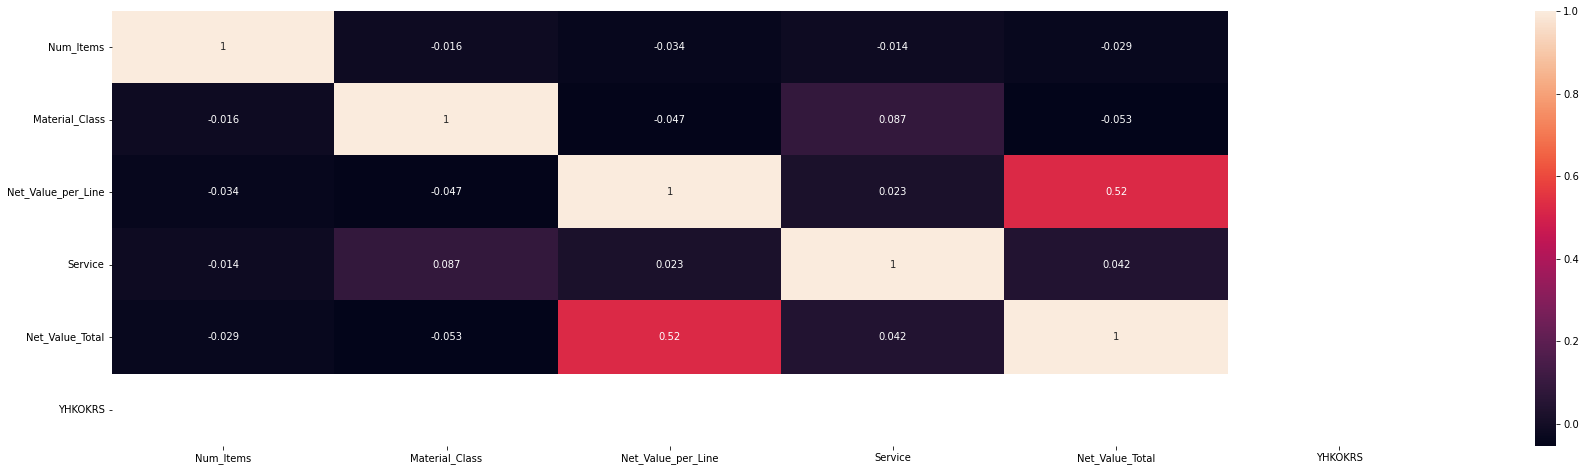

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(df_all.corr(), annot=True)

## Data/Feature Processing

### Creating Features

In [ ]:
df_all

,Sales_Order,Item_Position,Type,Customer_ID,Num_Items,Material_Code,Material_Class,Cost_Center,Net_Value_per_Line,Service,Sales_Organization,Creation_Date,Creator,Document_Type,Release_Date,Delivery,Net_Value_Total,YHKOKRS,Business_Unit
0,0xD8E91B197C354720BFFF82604C2BCE941328B09666FD...,0,SOP,0x049CFC54FE8AA9A88BA48E6D729DE681D1AA40D0B4BB...,1.00,0xB745ED79054E02EE21C03C29450377E8F44EEB303212...,222.00,0x63FD44F8C83170E469C323C958E965D5CC1BCAEAAE22...,"1,022,804.00",0.00,A,2021-08-10 00:00:00+00:00,0xD8E1A28EDC2B7873E61325FE1B635AF912A2C5446532...,Order,2021-08-10,Not relevant,"1,022,804.00","5,180.00",BU_A
1,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,5.00,0x8583E2D6F353DC6EDDDE366A0E919497DE6A2EA7EC0A...,19.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"1,022,668.00",0.00,A,2021-02-03 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-02-03,Not relevant,"601,168.00","5,180.00",BU_A
2,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,100.00,0x9A9E33E74718E5336FCA1FE1ED3F5124E49B1C2744DF...,225.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"946,629.00",0.00,A,2021-02-03 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-02-03,Not relevant,"601,168.00","5,180.00",BU_A
3,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,5.00,0x8583E2D6F353DC6EDDDE366A0E919497DE6A2EA7EC0A...,19.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"1,022,668.00",0.00,A,2021-02-03 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-02-03,Not relevant,"601,168.00","5,180.00",BU_A
4,0x8F2A823AF136B3D9D7A12084581ED6EE4BE00D3933FD...,0,SOP,0x90759554753F755145F940206F77687A4BF0AEB99A9E...,100.00,0x9A9E33E74718E5336FCA1FE1ED3F5124E49B1C2744DF...,225.00,0x30C96D952C93DF87CA131F8E179E70B0608EBD77CAF1...,"946,629.00",0.00,A,2021-02-03 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-02-03,Not relevant,"601,168.00","5,180.00",BU_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410291,0x04EA79386A00BF693E3042F2F42DEDA6F320F0197036...,0,SOP,0xFCA0BFAA9FA6B1DFF746682DD36F7CAD2E8F50A8C3D8...,1.00,0xB530B60B85E7B0F3F9C88CCAA7502F7CBF3EE710369E...,288.00,0x622BB2FFB2B722627A7572FA2FF67D8BB3ADB48EE0E2...,"907,931.00",0.00,A,2021-04-20 00:00:00+00:00,0xD8E1A28EDC2B7873E61325FE1B635AF912A2C5446532...,Order,2021-04-20,Not relevant,"596,726.00","5,180.00",BU_A
1410292,0x04EA79386A00BF693E3042F2F42DEDA6F320F0197036...,0,SOP,0xFCA0BFAA9FA6B1DFF746682DD36F7CAD2E8F50A8C3D8...,1.00,0x3F2F9E2F7D80A84090173A40F8A445CCDADEB2D93B44...,288.00,0x622BB2FFB2B722627A7572FA2FF67D8BB3ADB48EE0E2...,"1,016,903.00",0.00,A,2021-04-20 00:00:00+00:00,0xD8E1A28EDC2B7873E61325FE1B635AF912A2C5446532...,Order,2021-04-20,Not relevant,"596,726.00","5,180.00",BU_A
1410293,0x02D7E33A1DBCF7BF3F4E57EC902169D6B22D89A273D7...,0,SOP,0x2B26F0FD2E4CE6A8AA6CFC0EABD29E89CD4860B95942...,1.00,0x62E2C64A88352397A68D8011ABB996C226AD88D13A38...,222.00,0x3937BF7E60D7666F208542D90B6DC35E577AD78CE30A...,"1,068,645.00",0.00,B,2021-04-29 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-04-29,Not relevant,"792,651.00","5,180.00",BU_A
1410294,0x02D7E33A1DBCF7BF3F4E57EC902169D6B22D89A273D7...,0,SOP,0x2B26F0FD2E4CE6A8AA6CFC0EABD29E89CD4860B95942...,7.00,0xCD475BE74BF3702BEE3EE3ACB386298E00AA095BB843...,222.00,0x3937BF7E60D7666F208542D90B6DC35E577AD78CE30A...,"845,316.00",0.00,B,2021-04-29 00:00:00+00:00,0x2500D9E578134DB667D820EA3100F880DAF13E408E67...,Order,2021-04-29,Not relevant,"792,651.00","5,180.00",BU_A


In [ ]:
df_all = df_all.sort_values(by=['Creation_Date'])

In [ ]:
df_0 = df_all.drop(columns=['Item_Position',"YHKOKRS","Release_Date"])
df_0

,Sales_Order,Type,Customer_ID,Num_Items,Material_Code,Material_Class,Cost_Center,Net_Value_per_Line,Service,Sales_Organization,Creation_Date,Creator,Document_Type,Delivery,Net_Value_Total,Business_Unit
943577,0x43CB37126F763F8E15A28B0975E7CD9B01B10DFFEAF5...,SOP,0xFF5DE04EFC10E26DE5DCD60AE7378C3B9779EB151887...,1.00,0xFEDDA100B45A275A842FBE99528888F8F5E7B690D4A5...,288.00,0x2C9818D3024B32E779637C8296CCF28B2EE4AE753795...,"2,963,102.00",0.00,A,2020-12-10 00:00:00+00:00,0x32DC0BCE26344BCED38AEAF5D8C59691AC8EC0581615...,Order,Completely processed,"871,422.00",BU_C
943578,0x43CB37126F763F8E15A28B0975E7CD9B01B10DFFEAF5...,SOP,0xFF5DE04EFC10E26DE5DCD60AE7378C3B9779EB151887...,0.00,0xFEDDA100B45A275A842FBE99528888F8F5E7B690D4A5...,288.00,0x2C9818D3024B32E779637C8296CCF28B2EE4AE753795...,"871,422.00",0.00,A,2020-12-10 00:00:00+00:00,0x32DC0BCE26344BCED38AEAF5D8C59691AC8EC0581615...,Order,Completely processed,"871,422.00",BU_C
943579,0x43CB37126F763F8E15A28B0975E7CD9B01B10DFFEAF5...,SOP,0xFF5DE04EFC10E26DE5DCD60AE7378C3B9779EB151887...,1.00,0xFEDDA100B45A275A842FBE99528888F8F5E7B690D4A5...,288.00,0x2C9818D3024B32E779637C8296CCF28B2EE4AE753795...,"2,963,102.00",0.00,A,2020-12-10 00:00:00+00:00,0x32DC0BCE26344BCED38AEAF5D8C59691AC8EC0581615...,Order,Completely processed,"871,422.00",BU_C
943580,0x43CB37126F763F8E15A28B0975E7CD9B01B10DFFEAF5...,SOP,0xFF5DE04EFC10E26DE5DCD60AE7378C3B9779EB151887...,1.00,0xFEDDA100B45A275A842FBE99528888F8F5E7B690D4A5...,288.00,0x2C9818D3024B32E779637C8296CCF28B2EE4AE753795...,"2,963,102.00",0.00,A,2020-12-10 00:00:00+00:00,0x32DC0BCE26344BCED38AEAF5D8C59691AC8EC0581615...,Order,Completely processed,"871,422.00",BU_C
943581,0x43CB37126F763F8E15A28B0975E7CD9B01B10DFFEAF5...,SOP,0xFF5DE04EFC10E26DE5DCD60AE7378C3B9779EB151887...,1.00,0xFEDDA100B45A275A842FBE99528888F8F5E7B690D4A5...,288.00,0x2C9818D3024B32E779637C8296CCF28B2EE4AE753795...,"87,845.00",0.00,A,2020-12-10 00:00:00+00:00,0x32DC0BCE26344BCED38AEAF5D8C59691AC8EC0581615...,Order,Completely processed,"871,422.00",BU_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393157,0xC63679525E36BF89D62C55AFAFFE3084A07A40D5103C...,SOP,0xC82823DD4F832D044E6F3D5BBB295500102D24830A7D...,1.00,0x09A5BEBE9B74E1F811781059586F2506F7EAD13912CA...,227.00,0xA245F2173A7425AA91AC5D8A8F5ED797B30E6AFB6138...,"2,963,102.00",1.00,NaN,NaT,NaN,NaN,NaN,NaN,BU_A
1393158,0xC63679525E36BF89D62C55AFAFFE3084A07A40D5103C...,SOP,0xC82823DD4F832D044E6F3D5BBB295500102D24830A7D...,1.00,0x0EDCB441B280BBE64F593A659B5C48EFA39B6E843848...,227.00,0xA245F2173A7425AA91AC5D8A8F5ED797B30E6AFB6138...,"2,963,102.00",1.00,NaN,NaT,NaN,NaN,NaN,NaN,BU_A
1393159,0xC63679525E36BF89D62C55AFAFFE3084A07A40D5103C...,SOP,0xC82823DD4F832D044E6F3D5BBB295500102D24830A7D...,1.00,0xB10D6FB4E098D634B52E0574CA22D51AF8C120BD9865...,227.00,0xA245F2173A7425AA91AC5D8A8F5ED797B30E6AFB6138...,"2,963,102.00",1.00,NaN,NaT,NaN,NaN,NaN,NaN,BU_A
1393160,0xC63679525E36BF89D62C55AFAFFE3084A07A40D5103C...,SOP,0xC82823DD4F832D044E6F3D5BBB295500102D24830A7D...,1.00,0x4C549DA3846C5CF1A001FDEABDBF6C8D6447AA38C5BE...,227.00,0xA245F2173A7425AA91AC5D8A8F5ED797B30E6AFB6138...,"2,963,102.00",1.00,NaN,NaT,NaN,NaN,NaN,NaN,BU_A


In [ ]:
df = df_0.groupby('Customer_ID').agg(sales_order_total_no = ('Sales_Order',"count"),
                                     
                                     creation_date = ("Creation_Date", list),
                                     num_days_between_first_and_last_order = ('Creation_Date', lambda x: (max(x)-min(x)).days),

                                     num_items_total = ("Num_Items", "sum"),
                                     net_value_per_line_sum = ("Net_Value_per_Line", "sum"),
                                     net_value_total_sum = ("Net_Value_Total", "sum"), 
                                     
                                     SOP_count = ("Type", lambda x: x[x=="SOP"].count()),
                                     STP_count = ("Type", lambda x: x[x=="STP"].count()),

                                     service_exists_count = ("Service", lambda x: x[x==1].count()),
                                     service_doesnt_exist_count = ("Service", lambda x: x[x==0].count()),

                                     sales_organization_A_count = ("Sales_Organization", lambda x: x[x=="A"].count()),
                                     sales_organization_B_count = ("Sales_Organization", lambda x: x[x=="B"].count()),

                                     bu_A_count = ("Business_Unit", lambda x: x[x=="BU_A"].count()),
                                     bu_B_count = ("Business_Unit", lambda x: x[x=="BU_B"].count()),
                                     bu_C_count = ("Business_Unit", lambda x: x[x=="BU_C"].count()),

                                     different_material_code_count = ("Material_Code", "nunique"),
                                     different_material_class_count = ("Material_Class", "nunique"),
                                     different_cost_center_count = ("Cost_Center", "nunique"),
                                     different_creator_count = ("Creator", "nunique"),
                                     different_document_type_count = ("Document_Type", "nunique"),
                                     different_delivery_count = ("Delivery", "nunique")).reset_index()                                
df

,Customer_ID,sales_order_total_no,creation_date,num_days_between_first_and_last_order,num_items_total,net_value_per_line_sum,net_value_total_sum,SOP_count,STP_count,service_exists_count,...,sales_organization_B_count,bu_A_count,bu_B_count,bu_C_count,different_material_code_count,different_material_class_count,different_cost_center_count,different_creator_count,different_document_type_count,different_delivery_count
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,11,"[2021-02-14 00:00:00+00:00, 2021-02-25 00:00:0...",170,53.00,"9,323,487.00","8,259,025.00",11,0,0,...,11,0,11,0,4,1,1,1,1,1
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,"[2021-03-01 00:00:00+00:00, 2021-03-01 00:00:0...",139,21.00,"17,154,221.00","13,782,045.00",17,0,0,...,17,13,4,0,17,7,4,1,1,1
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,[2021-11-07 00:00:00+00:00],0,1.00,"1,012,384.00","942,163.00",1,0,0,...,1,0,1,0,1,1,1,1,1,1
3,0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD...,80,"[2021-01-18 00:00:00+00:00, 2021-01-18 00:00:0...",374,228.00,"76,880,102.00","58,690,248.00",40,40,18,...,76,68,12,0,19,8,4,2,2,1
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,303,"[2020-12-13 00:00:00+00:00, 2020-12-13 00:00:0...",395,442.00,"329,772,068.00","276,607,599.00",205,98,0,...,0,0,0,303,91,17,2,6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0xFFAFAD99C7810393524EFD48A2BE215F026F7703485C...,45,"[2020-12-23 00:00:00+00:00, 2020-12-23 00:00:0...",348,149.00,"37,447,806.00","31,224,565.00",45,0,0,...,45,22,6,17,29,12,6,1,1,2
2557,0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB...,822,"[2020-12-17 00:00:00+00:00, 2020-12-17 00:00:0...",405,"3,709.00","816,899,780.00","270,862,985.00",800,22,7,...,778,440,203,179,141,24,10,5,1,2
2558,0xFFB38FD8DC9DF19BD829225AE8B38D5BCAF0A3B86772...,3,"[2021-03-01 00:00:00+00:00, 2021-03-01 00:00:0...",0,5.00,"3,058,240.00","2,466,189.00",3,0,0,...,3,3,0,0,3,3,2,1,1,1
2559,0xFFBA472FB2DDB72DC8E322331CD7C836840F5AFEB2EC...,251,"[2020-12-24 00:00:00+00:00, 2021-01-06 00:00:0...",395,552.00,"238,620,583.00","158,922,096.00",244,7,13,...,251,136,79,36,91,20,7,7,3,2


In [ ]:
df.iloc[0,2]

[Timestamp('2021-02-14 00:00:00+0000', tz='UTC'),
 Timestamp('2021-02-25 00:00:00+0000', tz='UTC'),
 Timestamp('2021-02-25 00:00:00+0000', tz='UTC'),
 Timestamp('2021-04-05 00:00:00+0000', tz='UTC'),
 Timestamp('2021-04-05 00:00:00+0000', tz='UTC'),
 Timestamp('2021-04-05 00:00:00+0000', tz='UTC'),
 Timestamp('2021-04-28 00:00:00+0000', tz='UTC'),
 Timestamp('2021-04-28 00:00:00+0000', tz='UTC'),
 Timestamp('2021-07-05 00:00:00+0000', tz='UTC'),
 Timestamp('2021-08-02 00:00:00+0000', tz='UTC'),
 Timestamp('2021-08-03 00:00:00+0000', tz='UTC')]

In [ ]:
df = df.drop(columns=['net_value_total_sum'])

In [ ]:
df['SOP_percentage'] = (df['SOP_count'] / df['sales_order_total_no'])
df['STP_percentage'] = 1-df['SOP_percentage']

df["service_exists_percentage"] = (df["service_exists_count"] / df['sales_order_total_no'])
df["service_doesnt_exists_percentage"] = 1-df["service_exists_percentage"]

df["sales_organization_A_percentage"] = (df["sales_organization_A_count"] / df['sales_order_total_no'])
df["sales_organization_B_percentage"] = 1-df["sales_organization_A_percentage"]

df["bu_A_percentage"] = (df["bu_A_count"] / df['sales_order_total_no'])
df["bu_B_percentage"] = (df["bu_B_count"] / df['sales_order_total_no'])
df["bu_C_percentage"] = 1-(df["bu_A_percentage"]+df["bu_B_percentage"])


df['different_material_code_percentage'] = (df['different_material_code_count'] / df['sales_order_total_no'])

df['different_material_class_percentage'] = (df['different_material_class_count'] / df['sales_order_total_no'])

df['different_cost_center_percentage'] = (df['different_cost_center_count'] / df['sales_order_total_no'])

df['different_creator_percentage'] = (df['different_creator_count'] / df['sales_order_total_no'])

df['different_document_type_percentage'] = (df['different_document_type_count'] / df['sales_order_total_no'])

df['different_delivery_percentage'] = (df['different_delivery_count'] / df['sales_order_total_no'])

df

,Customer_ID,sales_order_total_no,creation_date,num_days_between_first_and_last_order,num_items_total,net_value_per_line_sum,SOP_count,STP_count,service_exists_count,service_doesnt_exist_count,...,sales_organization_B_percentage,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,different_document_type_percentage,different_delivery_percentage
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,11,"[2021-02-14 00:00:00+00:00, 2021-02-25 00:00:0...",170,53.00,"9,323,487.00",11,0,0,11,...,1.00,0.00,1.00,0.00,0.36,0.09,0.09,0.09,0.09,0.09
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,"[2021-03-01 00:00:00+00:00, 2021-03-01 00:00:0...",139,21.00,"17,154,221.00",17,0,0,17,...,1.00,0.76,0.24,0.00,1.00,0.41,0.24,0.06,0.06,0.06
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,[2021-11-07 00:00:00+00:00],0,1.00,"1,012,384.00",1,0,0,1,...,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00
3,0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD...,80,"[2021-01-18 00:00:00+00:00, 2021-01-18 00:00:0...",374,228.00,"76,880,102.00",40,40,18,62,...,0.95,0.85,0.15,0.00,0.24,0.10,0.05,0.03,0.03,0.01
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,303,"[2020-12-13 00:00:00+00:00, 2020-12-13 00:00:0...",395,442.00,"329,772,068.00",205,98,0,303,...,0.00,0.00,0.00,1.00,0.30,0.06,0.01,0.02,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0xFFAFAD99C7810393524EFD48A2BE215F026F7703485C...,45,"[2020-12-23 00:00:00+00:00, 2020-12-23 00:00:0...",348,149.00,"37,447,806.00",45,0,0,45,...,1.00,0.49,0.13,0.38,0.64,0.27,0.13,0.02,0.02,0.04
2557,0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB...,822,"[2020-12-17 00:00:00+00:00, 2020-12-17 00:00:0...",405,"3,709.00","816,899,780.00",800,22,7,815,...,0.95,0.54,0.25,0.22,0.17,0.03,0.01,0.01,0.00,0.00
2558,0xFFB38FD8DC9DF19BD829225AE8B38D5BCAF0A3B86772...,3,"[2021-03-01 00:00:00+00:00, 2021-03-01 00:00:0...",0,5.00,"3,058,240.00",3,0,0,3,...,1.00,1.00,0.00,0.00,1.00,1.00,0.67,0.33,0.33,0.33
2559,0xFFBA472FB2DDB72DC8E322331CD7C836840F5AFEB2EC...,251,"[2020-12-24 00:00:00+00:00, 2021-01-06 00:00:0...",395,552.00,"238,620,583.00",244,7,13,238,...,1.00,0.54,0.31,0.14,0.36,0.08,0.03,0.03,0.01,0.01


In [ ]:
df['interarrival'] = df.creation_date.apply(lambda x: pd.Series(x).diff().dt.days.iloc[1:].astype(int).tolist() if (len(x)>1 and pd.NaT not in x)  else [0])
df

,Customer_ID,sales_order_total_no,creation_date,num_days_between_first_and_last_order,num_items_total,net_value_per_line_sum,SOP_count,STP_count,service_exists_count,service_doesnt_exist_count,...,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,different_document_type_percentage,different_delivery_percentage,interarrival
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,11,"[2021-02-14 00:00:00+00:00, 2021-02-25 00:00:0...",170,53.00,"9,323,487.00",11,0,0,11,...,0.00,1.00,0.00,0.36,0.09,0.09,0.09,0.09,0.09,"[11, 0, 39, 0, 0, 23, 0, 68, 28, 1]"
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,"[2021-03-01 00:00:00+00:00, 2021-03-01 00:00:0...",139,21.00,"17,154,221.00",17,0,0,17,...,0.76,0.24,0.00,1.00,0.41,0.24,0.06,0.06,0.06,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 139..."
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,[2021-11-07 00:00:00+00:00],0,1.00,"1,012,384.00",1,0,0,1,...,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,[0]
3,0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD...,80,"[2021-01-18 00:00:00+00:00, 2021-01-18 00:00:0...",374,228.00,"76,880,102.00",40,40,18,62,...,0.85,0.15,0.00,0.24,0.10,0.05,0.03,0.03,0.01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 0,..."
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,303,"[2020-12-13 00:00:00+00:00, 2020-12-13 00:00:0...",395,442.00,"329,772,068.00",205,98,0,303,...,0.00,0.00,1.00,0.30,0.06,0.01,0.02,0.00,0.01,"[0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0xFFAFAD99C7810393524EFD48A2BE215F026F7703485C...,45,"[2020-12-23 00:00:00+00:00, 2020-12-23 00:00:0...",348,149.00,"37,447,806.00",45,0,0,45,...,0.49,0.13,0.38,0.64,0.27,0.13,0.02,0.02,0.04,"[0, 0, 0, 0, 0, 0, 33, 0, 0, 0, 93, 0, 0, 0, 0..."
2557,0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB...,822,"[2020-12-17 00:00:00+00:00, 2020-12-17 00:00:0...",405,"3,709.00","816,899,780.00",800,22,7,815,...,0.54,0.25,0.22,0.17,0.03,0.01,0.01,0.00,0.00,"[0, 17, 0, 1, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
2558,0xFFB38FD8DC9DF19BD829225AE8B38D5BCAF0A3B86772...,3,"[2021-03-01 00:00:00+00:00, 2021-03-01 00:00:0...",0,5.00,"3,058,240.00",3,0,0,3,...,1.00,0.00,0.00,1.00,1.00,0.67,0.33,0.33,0.33,"[0, 0]"
2559,0xFFBA472FB2DDB72DC8E322331CD7C836840F5AFEB2EC...,251,"[2020-12-24 00:00:00+00:00, 2021-01-06 00:00:0...",395,552.00,"238,620,583.00",244,7,13,238,...,0.54,0.31,0.14,0.36,0.08,0.03,0.03,0.01,0.01,"[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0,..."


In [ ]:
df['max_interarrival'] = df.interarrival.apply(max)
df

,Customer_ID,sales_order_total_no,creation_date,num_days_between_first_and_last_order,num_items_total,net_value_per_line_sum,SOP_count,STP_count,service_exists_count,service_doesnt_exist_count,...,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,different_document_type_percentage,different_delivery_percentage,interarrival,max_interarrival
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,11,"[2021-02-14 00:00:00+00:00, 2021-02-25 00:00:0...",170,53.00,"9,323,487.00",11,0,0,11,...,1.00,0.00,0.36,0.09,0.09,0.09,0.09,0.09,"[11, 0, 39, 0, 0, 23, 0, 68, 28, 1]",68
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,"[2021-03-01 00:00:00+00:00, 2021-03-01 00:00:0...",139,21.00,"17,154,221.00",17,0,0,17,...,0.24,0.00,1.00,0.41,0.24,0.06,0.06,0.06,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 139...",139
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,[2021-11-07 00:00:00+00:00],0,1.00,"1,012,384.00",1,0,0,1,...,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,[0],0
3,0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD...,80,"[2021-01-18 00:00:00+00:00, 2021-01-18 00:00:0...",374,228.00,"76,880,102.00",40,40,18,62,...,0.15,0.00,0.24,0.10,0.05,0.03,0.03,0.01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 0,...",104
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,303,"[2020-12-13 00:00:00+00:00, 2020-12-13 00:00:0...",395,442.00,"329,772,068.00",205,98,0,303,...,0.00,1.00,0.30,0.06,0.01,0.02,0.00,0.01,"[0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0xFFAFAD99C7810393524EFD48A2BE215F026F7703485C...,45,"[2020-12-23 00:00:00+00:00, 2020-12-23 00:00:0...",348,149.00,"37,447,806.00",45,0,0,45,...,0.13,0.38,0.64,0.27,0.13,0.02,0.02,0.04,"[0, 0, 0, 0, 0, 0, 33, 0, 0, 0, 93, 0, 0, 0, 0...",127
2557,0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB...,822,"[2020-12-17 00:00:00+00:00, 2020-12-17 00:00:0...",405,"3,709.00","816,899,780.00",800,22,7,815,...,0.25,0.22,0.17,0.03,0.01,0.01,0.00,0.00,"[0, 17, 0, 1, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0...",33
2558,0xFFB38FD8DC9DF19BD829225AE8B38D5BCAF0A3B86772...,3,"[2021-03-01 00:00:00+00:00, 2021-03-01 00:00:0...",0,5.00,"3,058,240.00",3,0,0,3,...,0.00,0.00,1.00,1.00,0.67,0.33,0.33,0.33,"[0, 0]",0
2559,0xFFBA472FB2DDB72DC8E322331CD7C836840F5AFEB2EC...,251,"[2020-12-24 00:00:00+00:00, 2021-01-06 00:00:0...",395,552.00,"238,620,583.00",244,7,13,238,...,0.31,0.14,0.36,0.08,0.03,0.03,0.01,0.01,"[13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0,...",136


In [ ]:
df = df.drop(columns=['creation_date',"interarrival"])
df

,Customer_ID,sales_order_total_no,num_days_between_first_and_last_order,num_items_total,net_value_per_line_sum,SOP_count,STP_count,service_exists_count,service_doesnt_exist_count,sales_organization_A_count,...,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,different_document_type_percentage,different_delivery_percentage,max_interarrival
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,11,170,53.00,"9,323,487.00",11,0,0,11,0,...,0.00,1.00,0.00,0.36,0.09,0.09,0.09,0.09,0.09,68
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,139,21.00,"17,154,221.00",17,0,0,17,0,...,0.76,0.24,0.00,1.00,0.41,0.24,0.06,0.06,0.06,139
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,0,1.00,"1,012,384.00",1,0,0,1,0,...,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0
3,0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD...,80,374,228.00,"76,880,102.00",40,40,18,62,4,...,0.85,0.15,0.00,0.24,0.10,0.05,0.03,0.03,0.01,104
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,303,395,442.00,"329,772,068.00",205,98,0,303,303,...,0.00,0.00,1.00,0.30,0.06,0.01,0.02,0.00,0.01,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0xFFAFAD99C7810393524EFD48A2BE215F026F7703485C...,45,348,149.00,"37,447,806.00",45,0,0,45,0,...,0.49,0.13,0.38,0.64,0.27,0.13,0.02,0.02,0.04,127
2557,0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB...,822,405,"3,709.00","816,899,780.00",800,22,7,815,44,...,0.54,0.25,0.22,0.17,0.03,0.01,0.01,0.00,0.00,33
2558,0xFFB38FD8DC9DF19BD829225AE8B38D5BCAF0A3B86772...,3,0,5.00,"3,058,240.00",3,0,0,3,0,...,1.00,0.00,0.00,1.00,1.00,0.67,0.33,0.33,0.33,0
2559,0xFFBA472FB2DDB72DC8E322331CD7C836840F5AFEB2EC...,251,395,552.00,"238,620,583.00",244,7,13,238,0,...,0.54,0.31,0.14,0.36,0.08,0.03,0.03,0.01,0.01,136


In [ ]:
cor_matrix = df.corr().abs()
cor_matrix

,sales_order_total_no,num_days_between_first_and_last_order,num_items_total,net_value_per_line_sum,SOP_count,STP_count,service_exists_count,service_doesnt_exist_count,sales_organization_A_count,sales_organization_B_count,...,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,different_document_type_percentage,different_delivery_percentage,max_interarrival
sales_order_total_no,1.00,0.22,0.88,1.00,0.99,0.58,0.67,1.00,0.64,0.83,...,0.13,0.13,0.01,0.27,0.20,0.17,0.15,0.13,0.13,0.17
num_days_between_first_and_last_order,0.22,1.00,0.16,0.22,0.22,0.12,0.14,0.22,0.13,0.19,...,0.17,0.27,0.09,0.42,0.63,0.63,0.62,0.64,0.64,0.25
num_items_total,0.88,0.16,1.00,0.87,0.89,0.42,0.62,0.88,0.43,0.83,...,0.10,0.08,0.03,0.20,0.15,0.12,0.11,0.09,0.09,0.13
net_value_per_line_sum,1.00,0.22,0.87,1.00,0.98,0.58,0.68,1.00,0.65,0.82,...,0.13,0.12,0.01,0.27,0.20,0.17,0.15,0.13,0.13,0.17
SOP_count,0.99,0.22,0.89,0.98,1.00,0.43,0.64,0.99,0.58,0.85,...,0.13,0.12,0.01,0.26,0.20,0.17,0.15,0.13,0.13,0.18
STP_count,0.58,0.12,0.42,0.58,0.43,1.00,0.51,0.58,0.60,0.32,...,0.05,0.07,0.01,0.16,0.12,0.10,0.09,0.08,0.08,0.08
service_exists_count,0.67,0.14,0.62,0.68,0.64,0.51,1.00,0.65,0.43,0.56,...,0.08,0.07,0.01,0.15,0.12,0.10,0.09,0.08,0.08,0.11
service_doesnt_exist_count,1.00,0.22,0.88,1.00,0.99,0.58,0.65,1.00,0.64,0.83,...,0.13,0.13,0.00,0.27,0.21,0.17,0.15,0.13,0.13,0.18
sales_organization_A_count,0.64,0.13,0.43,0.65,0.58,0.60,0.43,0.64,1.00,0.10,...,0.07,0.10,0.03,0.17,0.12,0.10,0.09,0.08,0.08,0.11
sales_organization_B_count,0.83,0.19,0.83,0.82,0.85,0.32,0.56,0.83,0.10,1.00,...,0.11,0.09,0.03,0.23,0.18,0.15,0.13,0.11,0.11,0.15


In [ ]:
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
upper

,sales_order_total_no,num_days_between_first_and_last_order,num_items_total,net_value_per_line_sum,SOP_count,STP_count,service_exists_count,service_doesnt_exist_count,sales_organization_A_count,sales_organization_B_count,...,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,different_document_type_percentage,different_delivery_percentage,max_interarrival
sales_order_total_no,NaN,0.22,0.88,1.00,0.99,0.58,0.67,1.00,0.64,0.83,...,0.13,0.13,0.01,0.27,0.20,0.17,0.15,0.13,0.13,0.17
num_days_between_first_and_last_order,NaN,NaN,0.16,0.22,0.22,0.12,0.14,0.22,0.13,0.19,...,0.17,0.27,0.09,0.42,0.63,0.63,0.62,0.64,0.64,0.25
num_items_total,NaN,NaN,NaN,0.87,0.89,0.42,0.62,0.88,0.43,0.83,...,0.10,0.08,0.03,0.20,0.15,0.12,0.11,0.09,0.09,0.13
net_value_per_line_sum,NaN,NaN,NaN,NaN,0.98,0.58,0.68,1.00,0.65,0.82,...,0.13,0.12,0.01,0.27,0.20,0.17,0.15,0.13,0.13,0.17
SOP_count,NaN,NaN,NaN,NaN,NaN,0.43,0.64,0.99,0.58,0.85,...,0.13,0.12,0.01,0.26,0.20,0.17,0.15,0.13,0.13,0.18
STP_count,NaN,NaN,NaN,NaN,NaN,NaN,0.51,0.58,0.60,0.32,...,0.05,0.07,0.01,0.16,0.12,0.10,0.09,0.08,0.08,0.08
service_exists_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,0.43,0.56,...,0.08,0.07,0.01,0.15,0.12,0.10,0.09,0.08,0.08,0.11
service_doesnt_exist_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.64,0.83,...,0.13,0.13,0.00,0.27,0.21,0.17,0.15,0.13,0.13,0.18
sales_organization_A_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,...,0.07,0.10,0.03,0.17,0.12,0.10,0.09,0.08,0.08,0.11
sales_organization_B_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.11,0.09,0.03,0.23,0.18,0.15,0.13,0.11,0.11,0.15


In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
df_copy = df.copy()
df.drop(to_drop, axis=1, inplace=True)
df

,Customer_ID,sales_order_total_no,num_days_between_first_and_last_order,num_items_total,STP_count,service_exists_count,sales_organization_A_count,sales_organization_B_count,bu_A_count,bu_B_count,...,service_exists_percentage,sales_organization_A_percentage,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,max_interarrival
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,11,170,53.00,0,0,0,11,0,11,...,0.00,0.00,0.00,1.00,0.00,0.36,0.09,0.09,0.09,68
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,139,21.00,0,0,0,17,13,4,...,0.00,0.00,0.76,0.24,0.00,1.00,0.41,0.24,0.06,139
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,0,1.00,0,0,0,1,0,1,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0
3,0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD...,80,374,228.00,40,18,4,76,68,12,...,0.23,0.05,0.85,0.15,0.00,0.24,0.10,0.05,0.03,104
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,303,395,442.00,98,0,303,0,0,0,...,0.00,1.00,0.00,0.00,1.00,0.30,0.06,0.01,0.02,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0xFFAFAD99C7810393524EFD48A2BE215F026F7703485C...,45,348,149.00,0,0,0,45,22,6,...,0.00,0.00,0.49,0.13,0.38,0.64,0.27,0.13,0.02,127
2557,0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB...,822,405,"3,709.00",22,7,44,778,440,203,...,0.01,0.05,0.54,0.25,0.22,0.17,0.03,0.01,0.01,33
2558,0xFFB38FD8DC9DF19BD829225AE8B38D5BCAF0A3B86772...,3,0,5.00,0,0,0,3,3,0,...,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.67,0.33,0
2559,0xFFBA472FB2DDB72DC8E322331CD7C836840F5AFEB2EC...,251,395,552.00,7,13,0,251,136,79,...,0.05,0.00,0.54,0.31,0.14,0.36,0.08,0.03,0.03,136


In [ ]:
df.isnull().sum()

Customer_ID                              0
sales_order_total_no                     0
num_days_between_first_and_last_order    0
num_items_total                          0
STP_count                                0
service_exists_count                     0
sales_organization_A_count               0
sales_organization_B_count               0
bu_A_count                               0
bu_B_count                               0
bu_C_count                               0
different_material_code_count            0
different_material_class_count           0
different_cost_center_count              0
different_creator_count                  0
different_document_type_count            0
different_delivery_count                 0
SOP_percentage                           0
service_exists_percentage                0
sales_organization_A_percentage          0
bu_A_percentage                          0
bu_B_percentage                          0
bu_C_percentage                          0
different_m

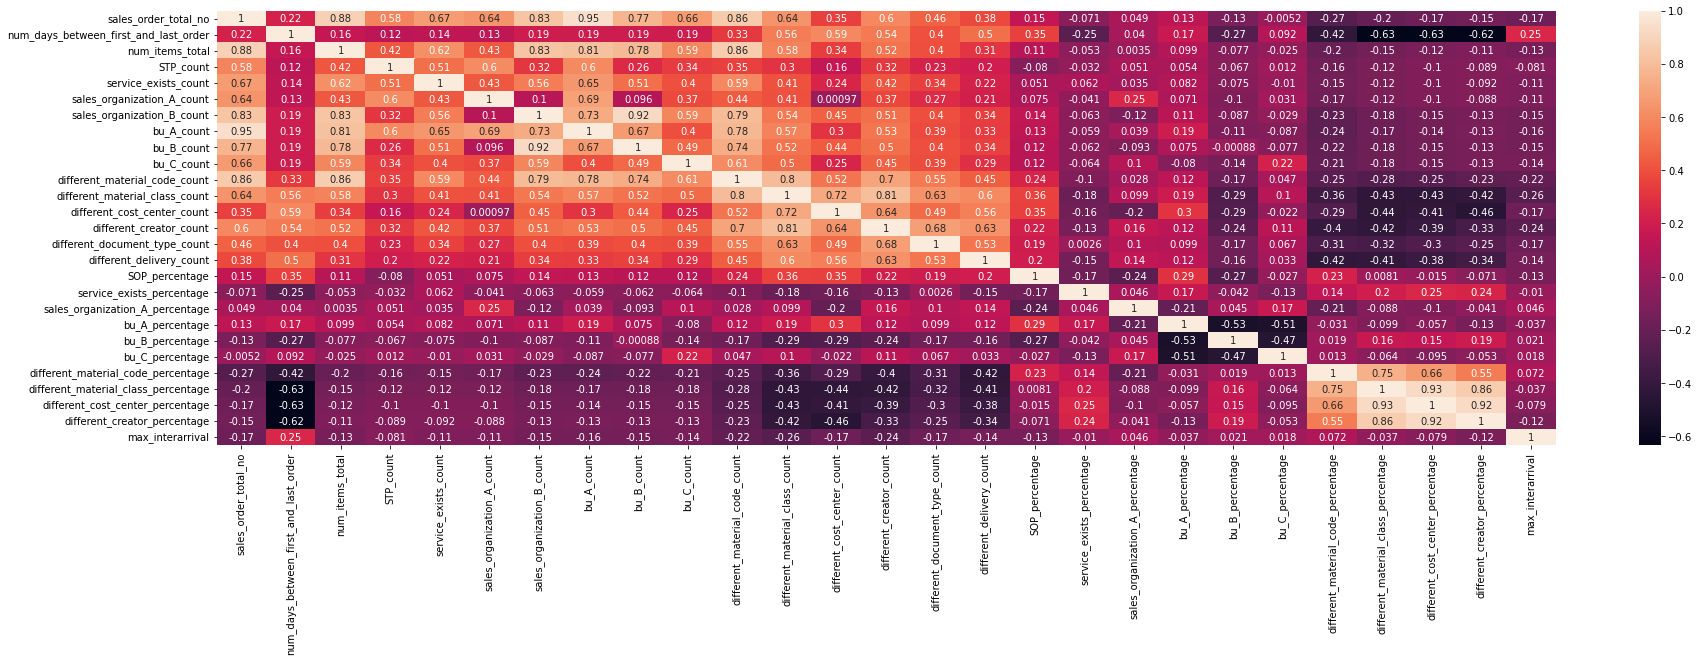

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(df.corr(), annot=True)

### Creating Train Data

In [ ]:
clas_copy = clas.copy()
clas_copy = clas_copy.drop(columns=['Test_set_id'])

# adding reseller column to train data
train_data =  pd.merge(df, clas_copy, on=["Customer_ID"], how="left")
train_data

,Customer_ID,sales_order_total_no,num_days_between_first_and_last_order,num_items_total,STP_count,service_exists_count,sales_organization_A_count,sales_organization_B_count,bu_A_count,bu_B_count,...,sales_organization_A_percentage,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,max_interarrival,Reseller
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,11,170,53.00,0,0,0,11,0,11,...,0.00,0.00,1.00,0.00,0.36,0.09,0.09,0.09,68,0.00
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,139,21.00,0,0,0,17,13,4,...,0.00,0.76,0.24,0.00,1.00,0.41,0.24,0.06,139,0.00
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,0,1.00,0,0,0,1,0,1,...,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0,0.00
3,0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD...,80,374,228.00,40,18,4,76,68,12,...,0.05,0.85,0.15,0.00,0.24,0.10,0.05,0.03,104,NaN
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,303,395,442.00,98,0,303,0,0,0,...,1.00,0.00,0.00,1.00,0.30,0.06,0.01,0.02,53,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0xFFAFAD99C7810393524EFD48A2BE215F026F7703485C...,45,348,149.00,0,0,0,45,22,6,...,0.00,0.49,0.13,0.38,0.64,0.27,0.13,0.02,127,0.00
2557,0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB...,822,405,"3,709.00",22,7,44,778,440,203,...,0.05,0.54,0.25,0.22,0.17,0.03,0.01,0.01,33,0.00
2558,0xFFB38FD8DC9DF19BD829225AE8B38D5BCAF0A3B86772...,3,0,5.00,0,0,0,3,3,0,...,0.00,1.00,0.00,0.00,1.00,1.00,0.67,0.33,0,NaN
2559,0xFFBA472FB2DDB72DC8E322331CD7C836840F5AFEB2EC...,251,395,552.00,7,13,0,251,136,79,...,0.00,0.54,0.31,0.14,0.36,0.08,0.03,0.03,136,0.00


In [ ]:
train_data.isna().sum()

Customer_ID                                0
sales_order_total_no                       0
num_days_between_first_and_last_order      0
num_items_total                            0
STP_count                                  0
service_exists_count                       0
sales_organization_A_count                 0
sales_organization_B_count                 0
bu_A_count                                 0
bu_B_count                                 0
bu_C_count                                 0
different_material_code_count              0
different_material_class_count             0
different_cost_center_count                0
different_creator_count                    0
different_document_type_count              0
different_delivery_count                   0
SOP_percentage                             0
service_exists_percentage                  0
sales_organization_A_percentage            0
bu_A_percentage                            0
bu_B_percentage                            0
bu_C_perce

In [ ]:
train_data = train_data.dropna(subset=['Reseller'])
train_data

,Customer_ID,sales_order_total_no,num_days_between_first_and_last_order,num_items_total,STP_count,service_exists_count,sales_organization_A_count,sales_organization_B_count,bu_A_count,bu_B_count,...,sales_organization_A_percentage,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,max_interarrival,Reseller
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,11,170,53.00,0,0,0,11,0,11,...,0.00,0.00,1.00,0.00,0.36,0.09,0.09,0.09,68,0.00
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,139,21.00,0,0,0,17,13,4,...,0.00,0.76,0.24,0.00,1.00,0.41,0.24,0.06,139,0.00
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,0,1.00,0,0,0,1,0,1,...,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0,0.00
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,303,395,442.00,98,0,303,0,0,0,...,1.00,0.00,0.00,1.00,0.30,0.06,0.01,0.02,53,0.00
7,0x0098F258A5E60F27EDC78F52368D4ADA7FB3B675C482...,45,312,158.00,0,12,0,45,31,14,...,0.00,0.69,0.31,0.00,0.33,0.16,0.13,0.02,76,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0xFF726608576F41A17D67B5DE062DB982BEBDCED554D6...,9153,413,"57,044.00",44,29,9153,0,8,0,...,1.00,0.00,0.00,1.00,0.04,0.01,0.00,0.00,31,0.00
2556,0xFFAFAD99C7810393524EFD48A2BE215F026F7703485C...,45,348,149.00,0,0,0,45,22,6,...,0.00,0.49,0.13,0.38,0.64,0.27,0.13,0.02,127,0.00
2557,0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB...,822,405,"3,709.00",22,7,44,778,440,203,...,0.05,0.54,0.25,0.22,0.17,0.03,0.01,0.01,33,0.00
2559,0xFFBA472FB2DDB72DC8E322331CD7C836840F5AFEB2EC...,251,395,552.00,7,13,0,251,136,79,...,0.00,0.54,0.31,0.14,0.36,0.08,0.03,0.03,136,0.00


In [ ]:
list(train_data.columns)

['Customer_ID',
 'sales_order_total_no',
 'num_days_between_first_and_last_order',
 'num_items_total',
 'STP_count',
 'service_exists_count',
 'sales_organization_A_count',
 'sales_organization_B_count',
 'bu_A_count',
 'bu_B_count',
 'bu_C_count',
 'different_material_code_count',
 'different_material_class_count',
 'different_cost_center_count',
 'different_creator_count',
 'different_document_type_count',
 'different_delivery_count',
 'SOP_percentage',
 'service_exists_percentage',
 'sales_organization_A_percentage',
 'bu_A_percentage',
 'bu_B_percentage',
 'bu_C_percentage',
 'different_material_code_percentage',
 'different_material_class_percentage',
 'different_cost_center_percentage',
 'different_creator_percentage',
 'max_interarrival',
 'Reseller']

In [ ]:
# split into input (X) and output (y) variables
X = train_data.iloc[:,0:28]  
y = train_data.iloc[:,-1]    #target variable: reseller column

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=100, train_size=0.8, shuffle=True)

### Selecting Features

#### Chi-Square Test of Independence

Assumptions:

* Assumption 1: Both variables are categorical.
* Assumption 2: All observations are independent.
* Assumption 3: Cells in the contingency table are mutually exclusive.
* Assumption 4: Expected value of cells should be 5 or greater in at least 80% of cells.





**Null Hypothesis (H0):** Variables STP_count & Reseller are independent.

**Alternative Hypothesis (H1):** Variables STP_count & Reseller are not independent.

In [ ]:
crosstab = pd.crosstab(train_data['STP_count'], train_data['Reseller']) # cross-tabulation table between STP_count and Reseller columns.
crosstab

Reseller,0.00,1.00
STP_count,,
0,334,41
1,159,5
2,88,4
3,77,3
4,111,7
...,...,...
3982,0,1
5003,1,0
5062,1,0


In [ ]:
c, p, dof, expected = stats.chi2_contingency(crosstab)

print("Chi-Square Test Statistic:",c)
print("p-value:%.5f" % p)
print("Degrees of freedom:",dof)

Chi-Square Test Statistic: 579.8776058204617
p-value:0.00000
Degrees of freedom: 249


In [ ]:
print("p-value:%.5f" % p)
if p <0.05:
    print("Reject null hypothesis: The two variables are not independent.")
else:
    print("Fail to recejt null hypothesis: The two variables are independent.")

p-value:0.00000
Reject null hypothesis: The two variables are not independent.


In [ ]:
expected = pd.DataFrame(expected)
expected

,0,1
0,350.29,24.71
1,153.19,10.81
2,85.94,6.06
3,74.73,5.27
4,110.23,7.77
...,...,...
245,0.93,0.07
246,0.93,0.07
247,0.93,0.07
248,0.93,0.07


In [ ]:
# This will return a series where the index are the column names and the values are the mean of the values that are greater than 5. 
# If the value is greater than 0.8, 80% of the values in that column are greater than 5.
result = (expected > 5).mean()
print(result)

0   0.23
1   0.02
dtype: float64


**Null Hypothesis (H0):** Variables num_items_total & Reseller are independent.

**Alternative Hypothesis (H1):** Variables 	num_items_total & Reseller are not independent.

In [ ]:
crosstab = pd.crosstab(train_data['num_items_total'], train_data['Reseller']) # cross-tabulation table between STP_count and Reseller columns.
crosstab

Reseller,0.00,1.00
num_items_total,,
0.00,20,0
1.00,24,5
2.00,85,2
3.00,21,2
4.00,50,2
...,...,...
"171,472.00",0,1
"172,665.00",0,1
"302,793.00",0,1


In [ ]:
c, p, dof, expected = stats.chi2_contingency(crosstab)

print("Chi-Square Test Statistic:",c)
print("p-value:%.5f" % p)
print("Degrees of freedom:",dof)

Chi-Square Test Statistic: 1420.6134304140944
p-value:0.00000
Degrees of freedom: 1024


In [ ]:
print("p-value:%.5f" % p)
if p <0.05:
    print("Reject null hypothesis: The two variables are not independent.")
else:
    print("Fail to recejt null hypothesis: The two variables are independent.")

p-value:0.00000
Reject null hypothesis: The two variables are not independent.


In [ ]:
expected = pd.DataFrame(expected)
result = (expected > 5).mean()
print(result)

0   0.05
1   0.00
dtype: float64


**Null Hypothesis (H0):** Variables sales_order_total_no & Reseller are independent.

**Alternative Hypothesis (H1):** Variables sales_order_total_no & Reseller are not independent.

In [ ]:
crosstab = pd.crosstab(train_data['sales_order_total_no'], train_data['Reseller'])
crosstab

Reseller,0.00,1.00
sales_order_total_no,,
1,42,7
2,119,1
3,19,5
4,59,4
5,19,1
...,...,...
18699,1,0
19232,0,1
26961,0,1


In [ ]:
c, p, dof, expected = stats.chi2_contingency(crosstab)

print("Chi-Square Test Statistic:",c)
print("p-value:%.5f" % p)
print("Degrees of freedom:",dof)

Chi-Square Test Statistic: 1047.0069586205427
p-value:0.00000
Degrees of freedom: 712


In [ ]:
print("p-value:%.5f" % p)
if p <0.05:
    print("Reject null hypothesis: The two variables are not independent.")
else:
    print("Fail to recejt null hypothesis: The two variables are independent.")

p-value:0.00000
Reject null hypothesis: The two variables are not independent.


In [ ]:
expected = pd.DataFrame(expected)
result = (expected > 5).mean()
print(result)

0   0.09
1   0.00
dtype: float64


**Null Hypothesis (H0):** Variables max_interarrival & Reseller are independent.

**Alternative Hypothesis (H1):** Variables max_interarrival & Reseller are not independent.


In [ ]:
crosstab = pd.crosstab(train_data['max_interarrival'], train_data['Reseller'])
crosstab

Reseller,0.00,1.00
max_interarrival,,
0,309,12
1,1,0
4,1,0
5,3,1
6,2,0
...,...,...
349,1,0
351,1,0
353,1,0


In [ ]:
c, p, dof, expected = stats.chi2_contingency(crosstab)

print("Chi-Square Test Statistic:",c)
print("p-value:%.5f" % p)
print("Degrees of freedom:",dof)

Chi-Square Test Statistic: 299.1585421140798
p-value:0.05693
Degrees of freedom: 262


In [ ]:
print("p-value:%.5f" % p)
if p <0.05:
    print("Reject null hypothesis: The two variables are not independent.")
else:
    print("Fail to recejt null hypothesis: The two variables are independent.")

p-value:0.05693
Fail to recejt null hypothesis: The two variables are independent.


In [ ]:
expected = pd.DataFrame(expected)
result = (expected > 5).mean()
print(result)

0   0.45
1   0.00
dtype: float64


#### Mutual information

In [ ]:
# Select the numerical features and the target variable
X = train_data[["sales_order_total_no","num_days_between_first_and_last_order","num_items_total",
                "STP_count","service_exists_count","sales_organization_A_count","sales_organization_B_count",
                "bu_A_count","bu_B_count",'bu_C_count','different_material_code_count','different_material_class_count',
                'different_cost_center_count','different_creator_count','different_document_type_count','different_delivery_count',
                'SOP_percentage','service_exists_percentage','sales_organization_A_percentage','bu_A_percentage','bu_B_percentage',
                'bu_C_percentage','different_material_code_percentage','different_material_class_percentage',
                'different_cost_center_percentage','different_creator_percentage','max_interarrival']]
y = train_data['Reseller']

# Compute mutual information
mutual_info = mutual_info_classif(X, y, discrete_features=False)
mutual_info

array([0.01773971, 0.0100277 , 0.01833908, 0.01579449, 0.02443403,
       0.        , 0.02574883, 0.01485861, 0.02683652, 0.01021506,
       0.02457654, 0.01045602, 0.02684175, 0.01050123, 0.01571632,
       0.00178551, 0.01372849, 0.01082609, 0.0118611 , 0.01808378,
       0.0176644 , 0.01760798, 0.0204792 , 0.01508566, 0.01660893,
       0.01296666, 0.0170809 ])

In [ ]:
scores_df = pd.DataFrame({'Feature':X.columns,'Score':mutual_info.round(4)})
scores_df["Score"] = scores_df["Score"].apply(lambda x: "{:.4f}".format(x))

# Sort the dataframe by mutual information score
scores_df = scores_df.sort_values(by='Score',ascending=False)
scores_df

,Feature,Score
12,different_cost_center_count,0.0268
8,bu_B_count,0.0268
6,sales_organization_B_count,0.0257
10,different_material_code_count,0.0246
4,service_exists_count,0.0244
22,different_material_code_percentage,0.0205
2,num_items_total,0.0183
19,bu_A_percentage,0.0181
0,sales_order_total_no,0.0177
20,bu_B_percentage,0.0177


In [ ]:
# Set a threshold for the mutual information score
threshold = 0.015
scores_df = pd.DataFrame({'Feature':X.columns,'Score':mutual_info})
# Select the features with scores above the threshold
scores_df = scores_df[scores_df['Score'] > threshold]

# Sort the dataframe by mutual information score
scores_df = scores_df.sort_values(by='Score',ascending=False)
scores_df
# 15 features

,Feature,Score
12,different_cost_center_count,0.03
8,bu_B_count,0.03
6,sales_organization_B_count,0.03
10,different_material_code_count,0.02
4,service_exists_count,0.02
22,different_material_code_percentage,0.02
2,num_items_total,0.02
19,bu_A_percentage,0.02
0,sales_order_total_no,0.02
20,bu_B_percentage,0.02


In [ ]:
threshold = 0.017
scores_df = scores_df[scores_df['Score'] > threshold]
scores_df = scores_df.sort_values(by='Score',ascending=False)
scores_df
# 12 features

,Feature,Score
12,different_cost_center_count,0.03
8,bu_B_count,0.03
6,sales_organization_B_count,0.03
10,different_material_code_count,0.02
4,service_exists_count,0.02
22,different_material_code_percentage,0.02
2,num_items_total,0.02
19,bu_A_percentage,0.02
0,sales_order_total_no,0.02
20,bu_B_percentage,0.02


In [ ]:
threshold = 0.018
scores_df = scores_df[scores_df['Score'] > threshold]
scores_df = scores_df.sort_values(by='Score',ascending=False)
scores_df
# 9 features

,Feature,Score
12,different_cost_center_count,0.03
8,bu_B_count,0.03
6,sales_organization_B_count,0.03
10,different_material_code_count,0.02
4,service_exists_count,0.02
22,different_material_code_percentage,0.02
2,num_items_total,0.02
19,bu_A_percentage,0.02


In [ ]:
threshold = 0.021
scores_df = scores_df[scores_df['Score'] > threshold]
scores_df = scores_df.sort_values(by='Score',ascending=False)
scores_df
# 5 features

,Feature,Score
12,different_cost_center_count,0.03
8,bu_B_count,0.03
6,sales_organization_B_count,0.03
10,different_material_code_count,0.02
4,service_exists_count,0.02


In [ ]:
columns_to_keep_mi = ['Customer_ID', 'different_cost_center_count', 'service_exists_count', 'sales_organization_B_count', 'bu_B_count', 'different_material_code_count', 'Reseller']
columns_to_keep_mi_test = ['Customer_ID', 'different_cost_center_count', 'service_exists_count', 'sales_organization_B_count', 'bu_B_count', 'different_material_code_count', "prediction",	"Test_set_id"]

#### Fisher's Score

In [ ]:
# Perform Fisher score feature selection
selector = SelectKBest(score_func=f_classif, k=15)
X_new = selector.fit_transform(X, y)
X_new

array([[1.10000000e+01, 5.30000000e+01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 3.63636364e-01],
       [1.70000000e+01, 2.10000000e+01, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [8.22000000e+02, 3.70900000e+03, 7.00000000e+00, ...,
        9.73236010e-01, 5.35279805e-02, 1.71532847e-01],
       [2.51000000e+02, 5.52000000e+02, 1.30000000e+01, ...,
        9.72111554e-01, 0.00000000e+00, 3.62549801e-01],
       [2.40000000e+01, 2.40000000e+01, 0.00000000e+00, ...,
        5.00000000e-01, 1.00000000e+00, 8.33333333e-02]])

In [ ]:
scores=selector.scores_
feature_names = X.columns

fscores_df = pd.DataFrame({"feature":feature_names, "Fisher score":scores})

# Sort the dataframe by Fisher score
fscores_df = fscores_df.sort_values(by='Fisher score',ascending=False)
fscores_df

,feature,Fisher score
10,different_material_code_count,249.84
12,different_cost_center_count,129.12
2,num_items_total,120.21
6,sales_organization_B_count,119.73
8,bu_B_count,115.00
11,different_material_class_count,97.43
4,service_exists_count,94.34
14,different_document_type_count,84.95
13,different_creator_count,77.48
0,sales_order_total_no,72.57


In [ ]:
top_6 = fscores_df.head(6)
top_6

,feature,Fisher score
10,different_material_code_count,249.84
12,different_cost_center_count,129.12
2,num_items_total,120.21
6,sales_organization_B_count,119.73
8,bu_B_count,115.00
11,different_material_class_count,97.43


In [ ]:
top_10 = fscores_df.head(10)
top_10

,feature,Fisher score
10,different_material_code_count,249.84
12,different_cost_center_count,129.12
2,num_items_total,120.21
6,sales_organization_B_count,119.73
8,bu_B_count,115.00
11,different_material_class_count,97.43
4,service_exists_count,94.34
14,different_document_type_count,84.95
13,different_creator_count,77.48
0,sales_order_total_no,72.57


In [ ]:
columns_to_keep_fs = ['Customer_ID', 'different_material_code_count', 'different_cost_center_count', 'num_items_total', 'sales_organization_B_count', 'bu_B_count', 
                      'different_material_class_count', "service_exists_count", "different_document_type_count", "different_creator_count", "sales_order_total_no", 'Reseller']
columns_to_keep_fs_test = ['Customer_ID', 'different_material_code_count', 'different_cost_center_count', 'num_items_total', 'sales_organization_B_count', 'bu_B_count', 
                      'different_material_class_count', "service_exists_count", "different_document_type_count", "different_creator_count", "sales_order_total_no", "prediction",	"Test_set_id"]

#### Feature Importance

In [ ]:
train_data

,Customer_ID,sales_order_total_no,num_days_between_first_and_last_order,num_items_total,STP_count,service_exists_count,sales_organization_A_count,sales_organization_B_count,bu_A_count,bu_B_count,...,sales_organization_A_percentage,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,max_interarrival,Reseller
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,11,170,53.00,0,0,0,11,0,11,...,0.00,0.00,1.00,0.00,0.36,0.09,0.09,0.09,68,0.00
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,139,21.00,0,0,0,17,13,4,...,0.00,0.76,0.24,0.00,1.00,0.41,0.24,0.06,139,0.00
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,0,1.00,0,0,0,1,0,1,...,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0,0.00
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,303,395,442.00,98,0,303,0,0,0,...,1.00,0.00,0.00,1.00,0.30,0.06,0.01,0.02,53,0.00
7,0x0098F258A5E60F27EDC78F52368D4ADA7FB3B675C482...,45,312,158.00,0,12,0,45,31,14,...,0.00,0.69,0.31,0.00,0.33,0.16,0.13,0.02,76,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0xFF726608576F41A17D67B5DE062DB982BEBDCED554D6...,9153,413,"57,044.00",44,29,9153,0,8,0,...,1.00,0.00,0.00,1.00,0.04,0.01,0.00,0.00,31,0.00
2556,0xFFAFAD99C7810393524EFD48A2BE215F026F7703485C...,45,348,149.00,0,0,0,45,22,6,...,0.00,0.49,0.13,0.38,0.64,0.27,0.13,0.02,127,0.00
2557,0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB...,822,405,"3,709.00",22,7,44,778,440,203,...,0.05,0.54,0.25,0.22,0.17,0.03,0.01,0.01,33,0.00
2559,0xFFBA472FB2DDB72DC8E322331CD7C836840F5AFEB2EC...,251,395,552.00,7,13,0,251,136,79,...,0.00,0.54,0.31,0.14,0.36,0.08,0.03,0.03,136,0.00


In [ ]:
X = train_data.iloc[:,1:28]  # be careful if you are using Customer_ID as index (28 if you are using the whole data)
y = train_data.iloc[:,-1] 

In [ ]:
X

,sales_order_total_no,num_days_between_first_and_last_order,num_items_total,STP_count,service_exists_count,sales_organization_A_count,sales_organization_B_count,bu_A_count,bu_B_count,bu_C_count,...,service_exists_percentage,sales_organization_A_percentage,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,max_interarrival
0,11,170,53.00,0,0,0,11,0,11,0,...,0.00,0.00,0.00,1.00,0.00,0.36,0.09,0.09,0.09,68
1,17,139,21.00,0,0,0,17,13,4,0,...,0.00,0.00,0.76,0.24,0.00,1.00,0.41,0.24,0.06,139
2,1,0,1.00,0,0,0,1,0,1,0,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0
4,303,395,442.00,98,0,303,0,0,0,303,...,0.00,1.00,0.00,0.00,1.00,0.30,0.06,0.01,0.02,53
7,45,312,158.00,0,12,0,45,31,14,0,...,0.27,0.00,0.69,0.31,0.00,0.33,0.16,0.13,0.02,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,9153,413,"57,044.00",44,29,9153,0,8,0,9145,...,0.00,1.00,0.00,0.00,1.00,0.04,0.01,0.00,0.00,31
2556,45,348,149.00,0,0,0,45,22,6,17,...,0.00,0.00,0.49,0.13,0.38,0.64,0.27,0.13,0.02,127
2557,822,405,"3,709.00",22,7,44,778,440,203,179,...,0.01,0.05,0.54,0.25,0.22,0.17,0.03,0.01,0.01,33
2559,251,395,552.00,7,13,0,251,136,79,36,...,0.05,0.00,0.54,0.31,0.14,0.36,0.08,0.03,0.03,136


In [ ]:
y

0      0.00
1      0.00
2      0.00
4      0.00
7      0.00
       ... 
2555   0.00
2556   0.00
2557   0.00
2559   0.00
2560   0.00
Name: Reseller, Length: 2049, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100, shuffle=True)

In [ ]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [ ]:
xg_clf = xgb.XGBClassifier(objective ='binary:logistic', learning_rate = 0.1, alpha = 10, silent=1)
xg_clf.fit(X_train,y_train)
preds = xg_clf.predict(X_test)

acc = accuracy_score(y_test, preds)
print("Accuracy: %f" % (acc))

Accuracy: 0.939024


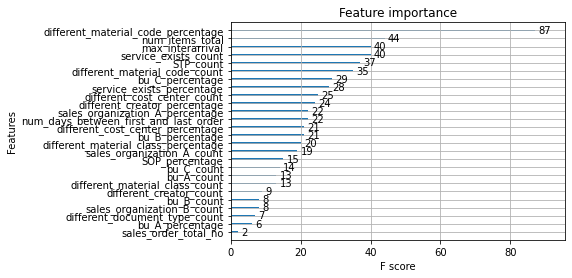

In [ ]:
xgb.plot_importance(xg_clf)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

In [ ]:
columns_to_keep_xg = ['Customer_ID', 'different_material_code_percentage', 'num_items_total', "max_interarrival", 'service_exists_count', 'STP_count', 'different_material_code_count', 'Reseller']
columns_to_keep_xg_test = ['Customer_ID', 'different_material_code_percentage', 'num_items_total', "max_interarrival", 'service_exists_count', 'STP_count', 'different_material_code_count', "prediction",	"Test_set_id"]

#### Correlation

In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
df_copy.drop(to_drop, axis=1, inplace=True)
df_copy

,Customer_ID,sales_order_total_no,num_days_between_first_and_last_order,STP_count,SOP_percentage,service_exists_percentage,sales_organization_A_percentage,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,max_interarrival
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,11,170,0,1.00,0.00,0.00,0.00,1.00,0.00,0.36,68
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,139,0,1.00,0.00,0.00,0.76,0.24,0.00,1.00,139
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,0,0,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0
3,0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD...,80,374,40,0.50,0.23,0.05,0.85,0.15,0.00,0.24,104
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,303,395,98,0.68,0.00,1.00,0.00,0.00,1.00,0.30,53
...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0xFFAFAD99C7810393524EFD48A2BE215F026F7703485C...,45,348,0,1.00,0.00,0.00,0.49,0.13,0.38,0.64,127
2557,0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB...,822,405,22,0.97,0.01,0.05,0.54,0.25,0.22,0.17,33
2558,0xFFB38FD8DC9DF19BD829225AE8B38D5BCAF0A3B86772...,3,0,0,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0
2559,0xFFBA472FB2DDB72DC8E322331CD7C836840F5AFEB2EC...,251,395,7,0.97,0.05,0.00,0.54,0.31,0.14,0.36,136


In [ ]:
df_copy.isnull().sum()

Customer_ID                              0
sales_order_total_no                     0
num_days_between_first_and_last_order    0
STP_count                                0
SOP_percentage                           0
service_exists_percentage                0
sales_organization_A_percentage          0
bu_A_percentage                          0
bu_B_percentage                          0
bu_C_percentage                          0
different_material_code_percentage       0
max_interarrival                         0
dtype: int64

In [ ]:
columns_to_keep_cor = ['Customer_ID', 'sales_order_total_no', 'num_days_between_first_and_last_order', 'STP_count', 'SOP_percentage', 'service_exists_percentage', "sales_organization_A_percentage", 
                       "bu_A_percentage", "bu_B_percentage", "bu_C_percentage", "different_material_code_percentage", "max_interarrival", 'Reseller']
columns_to_keep_cor_test = ['Customer_ID', 'sales_order_total_no', 'num_days_between_first_and_last_order', 'STP_count', 'SOP_percentage', 'service_exists_percentage', "sales_organization_A_percentage", 
                       "bu_A_percentage", "bu_B_percentage", "bu_C_percentage", "different_material_code_percentage", "max_interarrival", "prediction",	"Test_set_id"]

## Model Training

In [ ]:
# adding reseller and test_set_id columns to test data

all_data =  pd.merge(df, clas, on=["Customer_ID"], how="left")
all_data

,Customer_ID,sales_order_total_no,num_days_between_first_and_last_order,num_items_total,STP_count,service_exists_count,sales_organization_A_count,sales_organization_B_count,bu_A_count,bu_B_count,...,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,max_interarrival,Reseller,Test_set_id
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,11,170,53.00,0,0,0,11,0,11,...,0.00,1.00,0.00,0.36,0.09,0.09,0.09,68,0.00,NaN
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,139,21.00,0,0,0,17,13,4,...,0.76,0.24,0.00,1.00,0.41,0.24,0.06,139,0.00,NaN
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,0,1.00,0,0,0,1,0,1,...,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0,0.00,NaN
3,0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD...,80,374,228.00,40,18,4,76,68,12,...,0.85,0.15,0.00,0.24,0.10,0.05,0.03,104,NaN,"1,341.00"
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,303,395,442.00,98,0,303,0,0,0,...,0.00,0.00,1.00,0.30,0.06,0.01,0.02,53,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2556,0xFFAFAD99C7810393524EFD48A2BE215F026F7703485C...,45,348,149.00,0,0,0,45,22,6,...,0.49,0.13,0.38,0.64,0.27,0.13,0.02,127,0.00,NaN
2557,0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB...,822,405,"3,709.00",22,7,44,778,440,203,...,0.54,0.25,0.22,0.17,0.03,0.01,0.01,33,0.00,NaN
2558,0xFFB38FD8DC9DF19BD829225AE8B38D5BCAF0A3B86772...,3,0,5.00,0,0,0,3,3,0,...,1.00,0.00,0.00,1.00,1.00,0.67,0.33,0,NaN,"1,093.00"
2559,0xFFBA472FB2DDB72DC8E322331CD7C836840F5AFEB2EC...,251,395,552.00,7,13,0,251,136,79,...,0.54,0.31,0.14,0.36,0.08,0.03,0.03,136,0.00,NaN


In [ ]:
test_data = all_data[all_data['Test_set_id'].isin(test['id'])]
test_data.rename(columns = {'Reseller':'prediction'}, inplace = True)
test_data

,Customer_ID,sales_order_total_no,num_days_between_first_and_last_order,num_items_total,STP_count,service_exists_count,sales_organization_A_count,sales_organization_B_count,bu_A_count,bu_B_count,...,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,max_interarrival,prediction,Test_set_id
3,0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD...,80,374,228.00,40,18,4,76,68,12,...,0.85,0.15,0.00,0.24,0.10,0.05,0.03,104,NaN,"1,341.00"
5,0x0070A724615C0AF524125333A2B4FF943DF3633D6EF7...,14,185,16.00,7,0,14,0,0,14,...,0.00,1.00,0.00,0.14,0.14,0.07,0.21,178,NaN,168.00
6,0x0085EF845D67C54FA2A8B2A1D46D54B8B7A55E14587A...,5,126,5.00,0,0,0,5,4,1,...,0.80,0.20,0.00,0.40,0.40,0.40,0.20,126,NaN,494.00
9,0x00F4408A6892CD225BC8B0FBC08DA2264C3A325B48F8...,50,263,204.00,0,0,0,50,33,4,...,0.66,0.08,0.26,0.58,0.16,0.08,0.02,90,NaN,647.00
16,0x01A772E740C4E367F5FEE028BA9AE332604FD6290BA3...,361,396,"3,381.00",0,61,0,361,245,68,...,0.68,0.19,0.13,0.25,0.04,0.02,0.02,30,NaN,"1,571.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0xFD95F09E6B4856D1854233B9A26EA7DE818F507844F6...,4,0,8.00,2,0,0,4,4,0,...,1.00,0.00,0.00,0.50,0.50,0.25,0.25,0,NaN,"2,153.00"
2540,0xFDB1BA79A3E85273FBE9722F5B3501DF3B17636D762E...,2172,413,"13,582.00",0,66,2172,0,2169,0,...,1.00,0.00,0.00,0.11,0.02,0.00,0.00,23,NaN,"2,233.00"
2544,0xFE57EE71C01CBF802965C87615922CF5A3AF86B96609...,2,0,4.00,1,0,2,0,0,0,...,0.00,0.00,1.00,0.50,0.50,0.50,0.50,0,NaN,639.00
2548,0xFEACFF6FD82343BA76E6326152B341ED87BF176CE507...,202,336,282.00,60,16,104,98,95,12,...,0.47,0.06,0.47,0.35,0.08,0.06,0.02,43,NaN,"2,408.00"


In [ ]:
train_data = all_data[all_data['Reseller'].notna()].drop(["Test_set_id"], axis = 1)
train_data

,Customer_ID,sales_order_total_no,num_days_between_first_and_last_order,num_items_total,STP_count,service_exists_count,sales_organization_A_count,sales_organization_B_count,bu_A_count,bu_B_count,...,sales_organization_A_percentage,bu_A_percentage,bu_B_percentage,bu_C_percentage,different_material_code_percentage,different_material_class_percentage,different_cost_center_percentage,different_creator_percentage,max_interarrival,Reseller
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,11,170,53.00,0,0,0,11,0,11,...,0.00,0.00,1.00,0.00,0.36,0.09,0.09,0.09,68,0.00
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,139,21.00,0,0,0,17,13,4,...,0.00,0.76,0.24,0.00,1.00,0.41,0.24,0.06,139,0.00
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,0,1.00,0,0,0,1,0,1,...,0.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,0,0.00
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,303,395,442.00,98,0,303,0,0,0,...,1.00,0.00,0.00,1.00,0.30,0.06,0.01,0.02,53,0.00
7,0x0098F258A5E60F27EDC78F52368D4ADA7FB3B675C482...,45,312,158.00,0,12,0,45,31,14,...,0.00,0.69,0.31,0.00,0.33,0.16,0.13,0.02,76,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0xFF726608576F41A17D67B5DE062DB982BEBDCED554D6...,9153,413,"57,044.00",44,29,9153,0,8,0,...,1.00,0.00,0.00,1.00,0.04,0.01,0.00,0.00,31,0.00
2556,0xFFAFAD99C7810393524EFD48A2BE215F026F7703485C...,45,348,149.00,0,0,0,45,22,6,...,0.00,0.49,0.13,0.38,0.64,0.27,0.13,0.02,127,0.00
2557,0xFFB35C2E732E1D93CC2C7CBCF8C84F97182C69D593FB...,822,405,"3,709.00",22,7,44,778,440,203,...,0.05,0.54,0.25,0.22,0.17,0.03,0.01,0.01,33,0.00
2559,0xFFBA472FB2DDB72DC8E322331CD7C836840F5AFEB2EC...,251,395,552.00,7,13,0,251,136,79,...,0.00,0.54,0.31,0.14,0.36,0.08,0.03,0.03,136,0.00


In [ ]:
train_data = train_data[columns_to_keep_fs]
test_data = test_data[columns_to_keep_fs_test]

### Cross validation

In [ ]:
Neg_results = train_data[train_data["Reseller"] == 0]
Post_results  = train_data[train_data["Reseller"] == 1]
print(Neg_results.shape)
print(Post_results.shape)

(1914, 12)
(135, 12)


In [ ]:
pos_upsample = resample(Post_results,
             replace=True,
             n_samples=len(Neg_results),
             random_state=42)

print(pos_upsample.shape)

(1914, 12)


In [ ]:
pos_upsample

,Customer_ID,different_material_code_count,different_cost_center_count,num_items_total,sales_organization_B_count,bu_B_count,different_material_class_count,service_exists_count,different_document_type_count,different_creator_count,sales_order_total_no,Reseller
1835,0xB2EBC8F6FBEA5D5ABDAC746BE06FE5C07577DAE7DBB3...,262,10,"3,286.00",1310,1334,34,4,2,10,1364,1.00
1724,0xA762A3E87BB3EFB76D0A7AF0812BC6751BD4BBE26BBC...,1,1,2.00,1,0,1,0,1,1,1,1.00
307,0x1EEECCB960611A24E18B99CDE33D5ABA58DDF2024861...,4635,26,"703,713.00",53156,6928,153,2089,5,31,61227,1.00
1904,0xBBE52B1749A2B1B69C671087B08CA75C9D8A5F14A77D...,99,7,"1,640.00",148,18,15,37,1,2,148,1.00
1364,0x81C32A55D5A3A781A9DD2BEB5811EBD27DAC6A29B71D...,434,14,"30,440.00",4727,444,43,109,4,15,4817,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1897,0xBAE7201778B9C22824141289A8672F8AC76B303BD9EB...,2321,21,"400,885.00",17450,3858,114,984,5,38,19232,1.00
2285,0xDF6EDFAD8809D64E6F928A432BD40C55371298D8FFB4...,772,19,"34,193.00",4469,789,62,205,4,18,4727,1.00
2246,0xDC3BD8047DFD585AD5602905C112FF6AAF397FE572F5...,125,11,899.00,245,25,29,9,2,6,274,1.00
2024,0xC85D1BE1E9981358FC6A3DCAB3DA400615CD0F5384CB...,45,5,485.00,74,2,9,0,1,1,74,1.00


In [ ]:
data_upsampled = pd.concat([Neg_results, pos_upsample])

In [ ]:
data_upsampled

,Customer_ID,different_material_code_count,different_cost_center_count,num_items_total,sales_organization_B_count,bu_B_count,different_material_class_count,service_exists_count,different_document_type_count,different_creator_count,sales_order_total_no,Reseller
0,0x001B25A8708FB3B8655FD2BE121174FEE5E5FAEA97E3...,4,1,53.00,11,11,1,0,1,1,11,0.00
1,0x0044FB7B54210E0A8FA230093A71DA762E507030E6B5...,17,4,21.00,17,4,7,0,1,1,17,0.00
2,0x004C47E0A4A96528AC302E142E0CE52CC8CFDD979D17...,1,1,1.00,1,1,1,0,1,1,1,0.00
4,0x005C37F189C563C903F70761C04175F836C49C93D97C...,91,2,442.00,0,0,17,0,1,6,303,0.00
7,0x0098F258A5E60F27EDC78F52368D4ADA7FB3B675C482...,15,6,158.00,45,14,7,12,1,1,45,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1897,0xBAE7201778B9C22824141289A8672F8AC76B303BD9EB...,2321,21,"400,885.00",17450,3858,114,984,5,38,19232,1.00
2285,0xDF6EDFAD8809D64E6F928A432BD40C55371298D8FFB4...,772,19,"34,193.00",4469,789,62,205,4,18,4727,1.00
2246,0xDC3BD8047DFD585AD5602905C112FF6AAF397FE572F5...,125,11,899.00,245,25,29,9,2,6,274,1.00
2024,0xC85D1BE1E9981358FC6A3DCAB3DA400615CD0F5384CB...,45,5,485.00,74,2,9,0,1,1,74,1.00


In [ ]:
Features = data_upsampled.drop(columns = ['Reseller', 'Customer_ID'])

In [ ]:
Features_list = Features.to_numpy()
Features_list

array([[  4.,   1.,  53., ...,   1.,   1.,  11.],
       [ 17.,   4.,  21., ...,   1.,   1.,  17.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       ...,
       [125.,  11., 899., ...,   2.,   6., 274.],
       [ 45.,   5., 485., ...,   1.,   1.,  74.],
       [ 34.,   4., 145., ...,   2.,   2.,  45.]])

In [ ]:
Features.isna().sum()

different_material_code_count     0
different_cost_center_count       0
num_items_total                   0
sales_organization_B_count        0
bu_B_count                        0
different_material_class_count    0
service_exists_count              0
different_document_type_count     0
different_creator_count           0
sales_order_total_no              0
dtype: int64

In [ ]:
dv = data_upsampled['Reseller']
dv

0      0.00
1      0.00
2      0.00
4      0.00
7      0.00
       ... 
1897   1.00
2285   1.00
2246   1.00
2024   1.00
229    1.00
Name: Reseller, Length: 3828, dtype: float64

In [ ]:
dv.isna().sum()

0

In [ ]:
dv = dv.astype(int)

In [ ]:
dv_list = dv.values.tolist()
dv_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
dv_array = np.array(dv_list)
dv_array

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
dv2 = sum(train_data['Reseller'])
dv2

135.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Features_list, dv_list, test_size = 0.2, random_state = 42)

### Decision Tree

In [ ]:
clf_en = DecisionTreeClassifier()
cfit = clf_en.fit(x_train, y_train)

In [ ]:
def cross_validation(model, _X, _y, _cv=5):
     _scoring = ['accuracy', 'precision', 'recall', 'f1']
     results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
     return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()}

In [ ]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):

        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='black', label='Validation')
        plt.title(plot_title, fontsize=18)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=10)
        plt.ylabel(y_label, fontsize=10)
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=0)
cfit = clf_en.fit(x_train, y_train)
decision_tree_result = cross_validation(cfit, x_train, y_train, 5)
print(decision_tree_result)

{'Training Accuracy scores': array([0.92650061, 0.84565129, 0.86530612, 0.87877551, 0.8844898 ]), 'Mean Training Accuracy': 88.01446654611212, 'Training Precision scores': array([0.8876652 , 0.80512091, 0.84633028, 0.8527423 , 0.89478045]), 'Mean Training Precision': 0.8573278260529651, 'Training Recall scores': array([0.97815534, 0.91585761, 0.89563107, 0.91828479, 0.87378641]), 'Mean Training Recall': 0.9163430420711973, 'Training F1 scores': array([0.93071594, 0.85692657, 0.87028302, 0.88430074, 0.88415882]), 'Mean Training F1 Score': 0.8852770172535394, 'Validation Accuracy scores': array([0.88743883, 0.82055465, 0.86601307, 0.86928105, 0.85947712]), 'Mean Validation Accuracy': 86.05529433089168, 'Validation Precision scores': array([0.83707865, 0.78028169, 0.8470948 , 0.83577713, 0.85173502]), 'Mean Validation Precision': 0.8303934569844115, 'Validation Recall scores': array([0.96440129, 0.89644013, 0.89644013, 0.9223301 , 0.87378641]), 'Mean Validation Recall': 0.9106796116504855

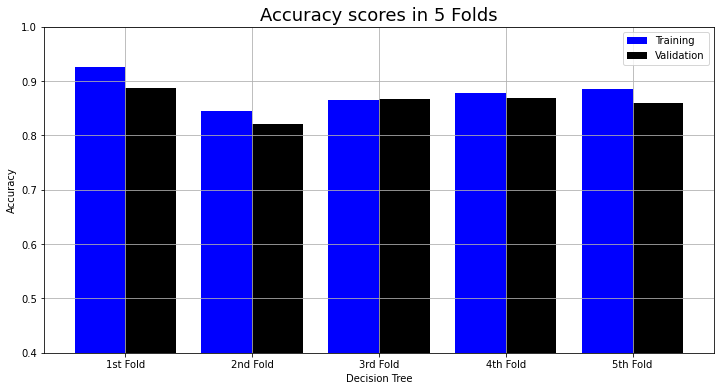

In [ ]:
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

In [ ]:
def cross_validation(model, _X, _y, _cv=5):
     _scoring = ['accuracy', 'precision', 'recall', 'f1']
     results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
     return results
   #return {"Mean Training Recall": results['train_recall'].mean(),
             # "Mean Training F1 Score": results['train_f1'].mean(),
             # "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              #"Mean Validation Precision": results['test_precision'].mean(),
             # "Mean Validation Recall": results['test_recall'].mean(),
              #"Mean Validation F1 Score": results['test_f1'].mean()}
    

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=11, random_state=0)
cfit = clf_en.fit(x_train, y_train)

In [ ]:
specificity = make_scorer(recall_score, pos_label = 0)

In [ ]:
recall = make_scorer(recall_score, average = 'weighted')

In [ ]:
print(cross_val_score(cfit, x_train, y_train, scoring = specificity, cv=5))

[0.80921053 0.74342105 0.8349835  0.81518152 0.84488449]


In [ ]:
print(cross_val_score(cfit, x_train, y_train, scoring = 'recall', cv= 5))

[0.96440129 0.89644013 0.89644013 0.9223301  0.87378641]


In [ ]:
print(cross_val_score(cfit, x_train, y_train, scoring = 'accuracy', cv= 5))

[0.88743883 0.82055465 0.86601307 0.86928105 0.85947712]


In [ ]:
print(cross_val_score(cfit, x_train, y_train, scoring = 'precision', cv= 5))

[0.83707865 0.78028169 0.8470948  0.83577713 0.85173502]


In [ ]:
y_pred = cross_val_predict(clf_en, x_train, y_train, cv=3)
ypred = pd.DataFrame(y_pred)
ypred

,0
0,1
1,1
2,0
3,0
4,1
...,...
3057,0
3058,0
3059,0
3060,0


In [ ]:
conf_mat = confusion_matrix(y_train, y_pred)
conf_mat

array([[1365,  152],
       [ 213, 1332]])

In [ ]:
Features2 = test_data.drop(columns = ['prediction', 'Test_set_id', 'Customer_ID'])
Features2

,different_material_code_count,different_cost_center_count,num_items_total,sales_organization_B_count,bu_B_count,different_material_class_count,service_exists_count,different_document_type_count,different_creator_count,sales_order_total_no
3,19,4,228.00,76,12,8,18,2,2,80
5,2,1,16.00,0,14,2,0,1,3,14
6,2,2,5.00,5,1,2,0,1,1,5
9,29,4,204.00,50,4,8,0,1,1,50
16,89,7,"3,381.00",361,68,15,61,2,6,361
...,...,...,...,...,...,...,...,...,...,...
2539,2,1,8.00,4,0,2,0,1,1,4
2540,249,6,"13,582.00",0,0,39,66,2,10,2172
2544,1,1,4.00,0,0,1,0,1,1,2
2548,70,12,282.00,98,12,17,16,2,4,202


In [ ]:
Features2_list = Features2.to_numpy()
Features2_list

array([[ 19.,   4., 228., ...,   2.,   2.,  80.],
       [  2.,   1.,  16., ...,   1.,   3.,  14.],
       [  2.,   2.,   5., ...,   1.,   1.,   5.],
       ...,
       [  1.,   1.,   4., ...,   1.,   1.,   2.],
       [ 70.,  12., 282., ...,   2.,   4., 202.],
       [  3.,   2.,   5., ...,   1.,   1.,   3.]])

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)
y_pred_en

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,

Model accuracy score with criterion entropy: 0.8094


[Text(0.5007183908045977, 0.9444444444444444, 'X[0] <= 202.5\nentropy = 1.0\nsamples = 3062\nvalue = [1517, 1545]'),
 Text(0.27586206896551724, 0.8333333333333334, 'X[9] <= 587.0\nentropy = 0.975\nsamples = 2386\nvalue = [1416, 970]'),
 Text(0.25287356321839083, 0.7222222222222222, 'X[3] <= 0.5\nentropy = 0.986\nsamples = 2255\nvalue = [1285, 970]'),
 Text(0.09195402298850575, 0.6111111111111112, 'X[1] <= 6.5\nentropy = 0.375\nsamples = 193\nvalue = [179, 14]'),
 Text(0.06896551724137931, 0.5, 'entropy = 0.0\nsamples = 177\nvalue = [177, 0]'),
 Text(0.11494252873563218, 0.5, 'X[4] <= 7.0\nentropy = 0.544\nsamples = 16\nvalue = [2, 14]'),
 Text(0.09195402298850575, 0.3888888888888889, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.13793103448275862, 0.3888888888888889, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.41379310344827586, 0.6111111111111112, 'X[6] <= 36.5\nentropy = 0.996\nsamples = 2062\nvalue = [1106, 956]'),
 Text(0.2988505747126437, 0.5, 'X[2] <= 2716.5

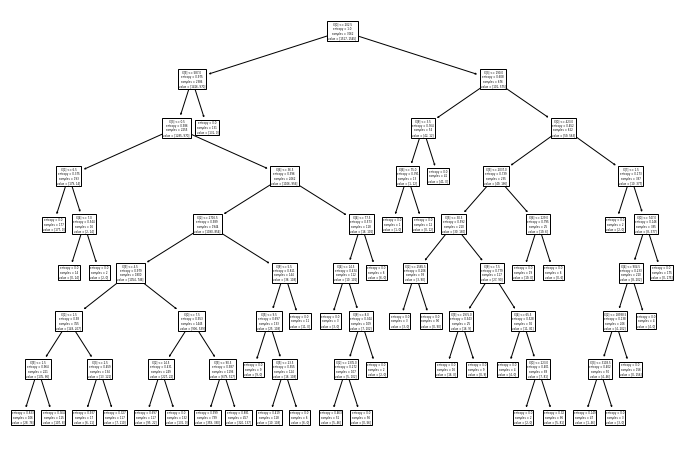

In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(x_train)
y_pred_train_en
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(x_train, y_train))

In [ ]:
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[297 100]
 [ 46 323]]


In [ ]:
# Random Search
param_dist = {'max_depth': randint(1, 100), 'min_samples_leaf': randint(1, 100)}
random_search = RandomizedSearchCV(clf_en, param_distributions=param_dist, n_iter=10, cv=5)
random_search.fit(x_train, y_train)

print("Best parameters of Random Search: ", random_search.best_params_)
print("Best score of Random Search: ", random_search.best_score_)

Best parameters of Random Search:  {'max_depth': 42, 'min_samples_leaf': 12}
Best score of Random Search:  0.8886367271215174


In [ ]:
# Decision Tree after Random Search
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=26, min_samples_leaf=11, random_state=0)
clf_en.fit(x_train, y_train)
y_pred_en = clf_en.predict(x_test)
y_pred_en

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,

Model accuracy score with criterion entropy: 0.8969


[Text(0.7216922397172236, 0.9736842105263158, 'X[0] <= 202.5\nentropy = 1.0\nsamples = 3062\nvalue = [1517, 1545]'),
 Text(0.5468549164524421, 0.9210526315789473, 'X[9] <= 587.0\nentropy = 0.975\nsamples = 2386\nvalue = [1416, 970]'),
 Text(0.5365721401028277, 0.868421052631579, 'X[3] <= 0.5\nentropy = 0.986\nsamples = 2255\nvalue = [1285, 970]'),
 Text(0.43693766066838047, 0.8157894736842105, 'X[1] <= 6.5\nentropy = 0.375\nsamples = 193\nvalue = [179, 14]'),
 Text(0.4266548843187661, 0.7631578947368421, 'entropy = 0.0\nsamples = 177\nvalue = [177, 0]'),
 Text(0.44722043701799485, 0.7631578947368421, 'entropy = 0.544\nsamples = 16\nvalue = [2, 14]'),
 Text(0.6362066195372751, 0.8157894736842105, 'X[6] <= 36.5\nentropy = 0.996\nsamples = 2062\nvalue = [1106, 956]'),
 Text(0.4677859897172236, 0.7631578947368421, 'X[2] <= 2716.5\nentropy = 0.989\nsamples = 1944\nvalue = [1090, 854]'),
 Text(0.213206940874036, 0.7105263157894737, 'X[9] <= 4.5\nentropy = 0.979\nsamples = 1800\nvalue = [1054

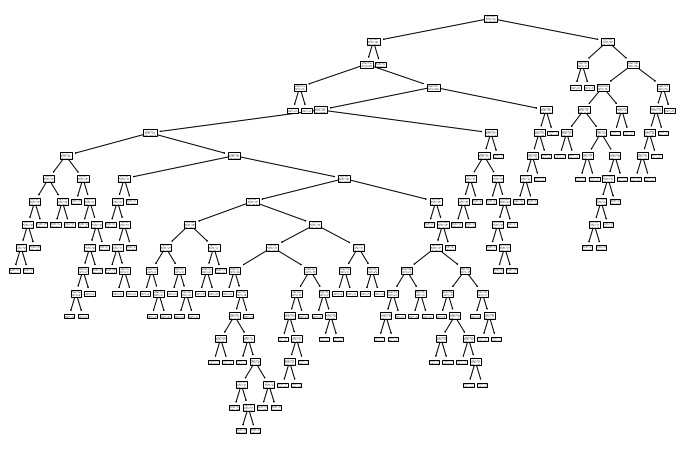

In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(x_train)
y_pred_train_en
plt.figure(figsize=(12,8))
tree.plot_tree(clf_en.fit(x_train, y_train))

In [ ]:
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[345  52]
 [ 27 342]]


### Naive Bayes#

In [ ]:
model = GaussianNB()

In [ ]:
def cross_validation(model, _X, _y, _cv=5):
     _scoring = ['accuracy', 'precision', 'recall', 'f1']
     results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
     return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()}

In [ ]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):

        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='black', label='Validation')
        plt.title(plot_title, fontsize=18)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=10)
        plt.ylabel(y_label, fontsize=10)
        plt.legend()
        plt.grid(True)
        plt.show()

In [ ]:
nb_result = cross_validation(model, x_train, y_train, 5)
print(nb_result)

{'Training Accuracy scores': array([0.61616987, 0.62392813, 0.62367347, 0.62081633, 0.63469388]), 'Mean Training Accuracy': 62.38563345305456, 'Training Precision scores': array([0.86633663, 0.87951807, 0.88106796, 0.87347932, 0.88662132]), 'Mean Training Precision': 0.8774046602090216, 'Training Recall scores': array([0.28317152, 0.29530744, 0.29368932, 0.29045307, 0.31634304]), 'Mean Training Recall': 0.2957928802588997, 'Training F1 scores': array([0.42682927, 0.44215627, 0.44053398, 0.43594414, 0.46630888]), 'Mean Training F1 Score': 0.4423545087157679, 'Validation Accuracy scores': array([0.65415987, 0.61337684, 0.61601307, 0.63562092, 0.60130719]), 'Mean Validation Accuracy': 62.40955762402841, 'Validation Precision scores': array([0.94495413, 0.84615385, 0.8490566 , 0.92156863, 0.81553398]), 'Mean Validation Precision': 0.8754534372802605, 'Validation Recall scores': array([0.33333333, 0.28478964, 0.29126214, 0.30420712, 0.27184466]), 'Mean Validation Recall': 0.2970873786407766

In [ ]:
print(cross_val_score(model, x_train, y_train, scoring = specificity, cv=5))

[0.98026316 0.94736842 0.94719472 0.97359736 0.93729373]


In [ ]:
print(cross_val_score(model, x_train, y_train, scoring = 'recall', cv= 5))

[0.33333333 0.28478964 0.29126214 0.30420712 0.27184466]


### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn_model = knn.fit(x_train, y_train)

In [ ]:
knn_result = cross_validation(knn_model, x_train, y_train, 5)
print(knn_result)

{'Training Accuracy scores': array([0.8962842 , 0.89138424, 0.88489796, 0.89020408, 0.89306122]), 'Mean Training Accuracy': 89.11663402804977, 'Training Precision scores': array([0.83815427, 0.83219178, 0.82671233, 0.83139136, 0.82860999]), 'Mean Training Precision': 0.8314119460028252, 'Training Recall scores': array([0.98462783, 0.98300971, 0.97653722, 0.98139159, 0.99352751]), 'Mean Training Recall': 0.9838187702265373, 'Training F1 scores': array([0.90550595, 0.90133531, 0.89540059, 0.90018553, 0.90360559]), 'Mean Training F1 Score': 0.901206595705947, 'Validation Accuracy scores': array([0.84828711, 0.85807504, 0.86928105, 0.86764706, 0.86437908]), 'Mean Validation Accuracy': 86.15338685773384, 'Validation Precision scores': array([0.78421053, 0.7983871 , 0.82072829, 0.81318681, 0.79427083]), 'Mean Validation Precision': 0.802156712185331, 'Validation Recall scores': array([0.96440129, 0.96116505, 0.94822006, 0.9579288 , 0.98705502]), 'Mean Validation Recall': 0.9637540453074432, 

In [ ]:
y_pred1 = knn.predict(x_test)
y_pred1

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
knn.score(x_test, y_test)

0.881201044386423

### Random Forest

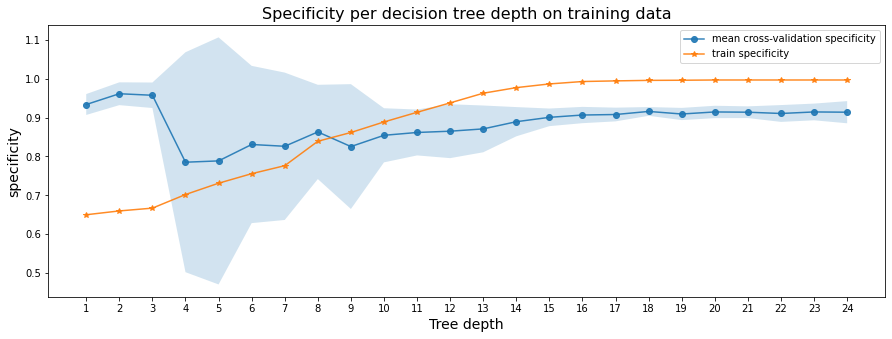

In [ ]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring= specificity):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    specificity_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        specificity_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    specificity_scores = np.array(specificity_scores)
    return cv_scores_mean, cv_scores_std, specificity_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, specificity_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation specificity', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, specificity_scores, '-*', label='train specificity', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('specificity', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_specificity_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths)

# plotting specificity
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_specificity_scores, 
                               'Specificity per decision tree depth on training data')


    

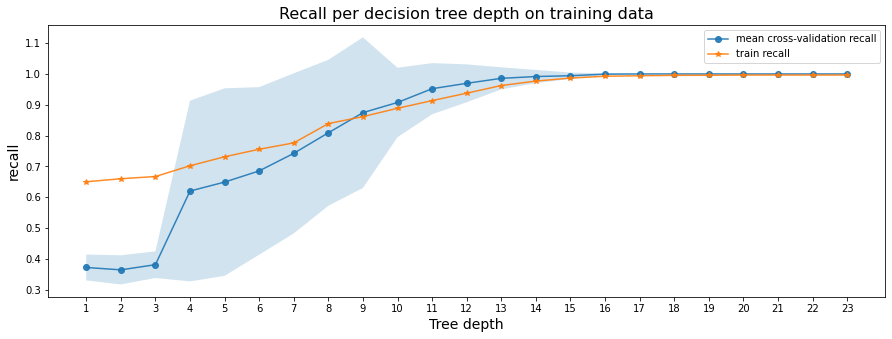

In [ ]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring= 'recall'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    recall_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        recall_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    recall_scores = np.array(recall_scores)
    return cv_scores_mean, cv_scores_std, recall_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, recall_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation recall', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, recall_scores, '-*', label='train recall', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('recall', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,24)
sm_cv_scores_mean, sm_cv_scores_std, sm_recall_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths)

# plotting specificity
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_recall_scores, 
                               'Recall per decision tree depth on training data')

In [ ]:
Features2 = train_data.drop(columns = ['Reseller', 'Customer_ID'])
Features_list2 = Features2.to_numpy()
Features_list2

array([[4.000e+00, 1.000e+00, 5.300e+01, ..., 1.000e+00, 1.000e+00,
        1.100e+01],
       [1.700e+01, 4.000e+00, 2.100e+01, ..., 1.000e+00, 1.000e+00,
        1.700e+01],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.410e+02, 1.000e+01, 3.709e+03, ..., 1.000e+00, 5.000e+00,
        8.220e+02],
       [9.100e+01, 7.000e+00, 5.520e+02, ..., 3.000e+00, 7.000e+00,
        2.510e+02],
       [2.000e+00, 2.000e+00, 2.400e+01, ..., 1.000e+00, 3.000e+00,
        2.400e+01]])

In [ ]:
y_pred_og = clf_en.predict(Features_list2)
y_pred_og

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
dv3 = train_data['Reseller']
dv3 = dv3.astype(int)
dv_list3 = dv3.values.tolist()
dv_list3

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,


In [ ]:
dv3_array = np.array(dv_list3)
dv3_array

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
cm = confusion_matrix(dv3_array, y_pred_og)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1734  180]
 [   8  127]]


In [ ]:
clf_rf = RandomForestClassifier(criterion='entropy', max_depth=26, min_samples_leaf=11, random_state=0)
cfit_rf = clf_rf.fit(x_train, y_train)

In [ ]:
 #define the model

cross_val_score(cfit_rf, x_train, y_train, scoring = 'recall', cv= 5)

array([0.97411003, 0.98705502, 0.97411003, 0.97087379, 0.99029126])

In [ ]:
clf_rf = RandomForestClassifier(criterion='entropy', max_depth=26, min_samples_leaf=11, random_state=0)
cfit_rf = clf_rf.fit(x_train, y_train)

In [ ]:
y_pred_rf = clf_rf.predict(x_test)
y_pred_rf

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[371  26]
 [  8 361]]


### Predictions

In [ ]:
testing = test_data.drop(columns = ['Customer_ID','prediction','Test_set_id'])

In [ ]:
real_test = testing.to_numpy()
real_test

array([[ 19.,   4., 228., ...,   2.,   2.,  80.],
       [  2.,   1.,  16., ...,   1.,   3.,  14.],
       [  2.,   2.,   5., ...,   1.,   1.,   5.],
       ...,
       [  1.,   1.,   4., ...,   1.,   1.,   2.],
       [ 70.,  12., 282., ...,   2.,   4., 202.],
       [  3.,   2.,   5., ...,   1.,   1.,   3.]])

In [ ]:
y_pred_rt = clf_rf.predict(real_test)
y_pred_rt

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
len(y_pred_rt)

512

In [ ]:
test_data_copy = test_data.drop(columns = ['prediction','Test_set_id'])
test_data_copy

,Customer_ID,different_material_code_count,different_cost_center_count,num_items_total,sales_organization_B_count,bu_B_count,different_material_class_count,service_exists_count,different_document_type_count,different_creator_count,sales_order_total_no
3,0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD...,19,4,228.00,76,12,8,18,2,2,80
5,0x0070A724615C0AF524125333A2B4FF943DF3633D6EF7...,2,1,16.00,0,14,2,0,1,3,14
6,0x0085EF845D67C54FA2A8B2A1D46D54B8B7A55E14587A...,2,2,5.00,5,1,2,0,1,1,5
9,0x00F4408A6892CD225BC8B0FBC08DA2264C3A325B48F8...,29,4,204.00,50,4,8,0,1,1,50
16,0x01A772E740C4E367F5FEE028BA9AE332604FD6290BA3...,89,7,"3,381.00",361,68,15,61,2,6,361
...,...,...,...,...,...,...,...,...,...,...,...
2539,0xFD95F09E6B4856D1854233B9A26EA7DE818F507844F6...,2,1,8.00,4,0,2,0,1,1,4
2540,0xFDB1BA79A3E85273FBE9722F5B3501DF3B17636D762E...,249,6,"13,582.00",0,0,39,66,2,10,2172
2544,0xFE57EE71C01CBF802965C87615922CF5A3AF86B96609...,1,1,4.00,0,0,1,0,1,1,2
2548,0xFEACFF6FD82343BA76E6326152B341ED87BF176CE507...,70,12,282.00,98,12,17,16,2,4,202


In [ ]:
y_pred_df = pd.DataFrame(y_pred_rt, columns = ['prediction'])
y_pred_df

,prediction
0,0
1,0
2,0
3,1
4,1
...,...
507,0
508,0
509,0
510,0


In [ ]:
extracted_col = y_pred_df["prediction"]

In [ ]:
test_data_copy = test_data_copy.join(extracted_col)
test_data_copy

,Customer_ID,different_material_code_count,different_cost_center_count,num_items_total,sales_organization_B_count,bu_B_count,different_material_class_count,service_exists_count,different_document_type_count,different_creator_count,sales_order_total_no,prediction
3,0x005B562E97E9BC101CE61FDF1148F30EAE5906816CAD...,19,4,228.00,76,12,8,18,2,2,80,1.00
5,0x0070A724615C0AF524125333A2B4FF943DF3633D6EF7...,2,1,16.00,0,14,2,0,1,3,14,0.00
6,0x0085EF845D67C54FA2A8B2A1D46D54B8B7A55E14587A...,2,2,5.00,5,1,2,0,1,1,5,1.00
9,0x00F4408A6892CD225BC8B0FBC08DA2264C3A325B48F8...,29,4,204.00,50,4,8,0,1,1,50,0.00
16,0x01A772E740C4E367F5FEE028BA9AE332604FD6290BA3...,89,7,"3,381.00",361,68,15,61,2,6,361,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2539,0xFD95F09E6B4856D1854233B9A26EA7DE818F507844F6...,2,1,8.00,4,0,2,0,1,1,4,NaN
2540,0xFDB1BA79A3E85273FBE9722F5B3501DF3B17636D762E...,249,6,"13,582.00",0,0,39,66,2,10,2172,NaN
2544,0xFE57EE71C01CBF802965C87615922CF5A3AF86B96609...,1,1,4.00,0,0,1,0,1,1,2,NaN
2548,0xFEACFF6FD82343BA76E6326152B341ED87BF176CE507...,70,12,282.00,98,12,17,16,2,4,202,NaN


In [ ]:
test_data_copy.to_csv('Output.csv', index = True)

In [ ]:
y_pred_df.to_csv('wtf.csv', index = True)

In [ ]:
test_data_sorted = test_data.sort_values("Test_set_id")
test_data_sorted

,Customer_ID,different_material_code_count,different_cost_center_count,num_items_total,sales_organization_B_count,bu_B_count,different_material_class_count,service_exists_count,different_document_type_count,different_creator_count,sales_order_total_no,prediction,Test_set_id
1595,0x9A208CC2D20277611D1E8EE55FDB5A11CBEC69E206C1...,7,4,4.00,0,10,4,18,2,2,29,NaN,11.00
63,0x0551930C36A0EC57869785D5175F371B9A99C3678BD6...,5,2,5.00,5,0,3,2,1,1,5,NaN,14.00
2513,0xFA69B4C9439A29094FFDDF578B6A2B76C97E8A2E5F0E...,45,8,224.00,52,66,12,0,1,4,118,NaN,17.00
1345,0x808CBED146D64C12BA401959F6ED855A344CAF562BF7...,6,1,26.00,12,12,3,0,1,1,12,NaN,24.00
963,0x5BF5733DBE6C90E285AE10B4A6E47F0B8F2A7537F02B...,1,1,8.00,0,8,1,0,1,1,8,NaN,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,0x46492E2D470D1E3CB3D86A97AD694A4957BA1FF98D80...,29,5,126.00,50,0,11,8,2,5,76,NaN,"2,533.00"
1758,0xAAA08E0CFB1458CF76D31F73F68A65DBA9B3CA1A8A96...,319,8,"3,777.00",0,78,49,4,2,17,1051,NaN,"2,535.00"
2257,0xDD0A72152FBE33EFC9849363B871744067BA0C24B8C7...,83,6,"1,174.00",426,43,20,66,1,3,426,NaN,"2,538.00"
1318,0x7E18FAFCE58C193B296C20540562DF0107ECAAB96351...,131,13,397.00,197,60,25,7,1,5,253,NaN,"2,551.00"


In [ ]:
testing2 = test_data_sorted.drop(columns = ['Customer_ID','prediction','Test_set_id'])
real_test2 = testing2.to_numpy()
real_test2

array([[7.000e+00, 4.000e+00, 4.000e+00, ..., 2.000e+00, 2.000e+00,
        2.900e+01],
       [5.000e+00, 2.000e+00, 5.000e+00, ..., 1.000e+00, 1.000e+00,
        5.000e+00],
       [4.500e+01, 8.000e+00, 2.240e+02, ..., 1.000e+00, 4.000e+00,
        1.180e+02],
       ...,
       [8.300e+01, 6.000e+00, 1.174e+03, ..., 1.000e+00, 3.000e+00,
        4.260e+02],
       [1.310e+02, 1.300e+01, 3.970e+02, ..., 1.000e+00, 5.000e+00,
        2.530e+02],
       [2.300e+01, 5.000e+00, 1.610e+02, ..., 1.000e+00, 5.000e+00,
        1.020e+02]])

In [ ]:
y_pred_rt2 = clf_rf.predict(real_test2)
y_pred_rt2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
y_pred_df2 = pd.DataFrame(y_pred_rt2, columns = ['prediction'])
y_pred_df2

,prediction
0,0
1,0
2,0
3,0
4,0
...,...
507,0
508,0
509,1
510,0


In [ ]:
extracted_col1 = y_pred_df2["prediction"]

In [ ]:
Ts_id = test_data_sorted['Test_set_id']
Ts_id

1595      11.00
63        14.00
2513      17.00
1345      24.00
963       30.00
         ...   
731    2,533.00
1758   2,535.00
2257   2,538.00
1318   2,551.00
942    2,560.00
Name: Test_set_id, Length: 512, dtype: float64

In [ ]:
Ts_id1 = Ts_id.astype(int)
Tsid_list = Ts_id1.values.tolist()
Tsid_array = np.array(Tsid_list)
Ts_id2 = pd.DataFrame(Tsid_array, columns = ['id'])
Ts_id2


,id
0,11
1,14
2,17
3,24
4,30
...,...
507,2533
508,2535
509,2538
510,2551


In [ ]:
Ts_id2 = Ts_id2.join(extracted_col1)
Ts_id2

,id,prediction
0,11,0
1,14,0
2,17,0
3,24,0
4,30,0
...,...,...
507,2533,0
508,2535,0
509,2538,1
510,2551,0


In [ ]:
Ts_id2.to_csv('submissions_predictions_sophisticated_sharks_8.csv', index = False)
files.download('submissions_predictions_sophisticated_sharks_8.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>